### After estimating the cell type abundance individually on each patient (grouped per replicate), we can look at the distrribution of cell types across the pathological annootations.  And look for enrichment of those cell types across certain regions?

In [1]:
from pathlib import Path
#import scanpy as sc
#import cell2location
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

DPI = 300
FONTSIZE = 20  # 42
#sc.settings.set_figure_params(
    #scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
#)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

#from vistools import utils

import scikit_posthocs

import seaborn as sns
custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)

from matplotlib.patches import Rectangle

In [2]:
SAMPLE_LIST = ['SN048_A416371', 'SN84_A120838', 'SN123_A595688']

In [3]:
SAMPLE_NAME = '_'.join([s for s in SAMPLE_LIST])
SAMPLE_NAME

'SN048_A416371_SN84_A120838_SN123_A595688'

In [4]:
DIR2SAVE = Path(f"/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Valdeolivas_2023/cell2loc_pathologist_annotations/{SAMPLE_NAME}/")
DIR2SAVE.mkdir(exist_ok=True, parents=True)
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(exist_ok=True, parents=True)

In [5]:
df = pd.read_csv(DIR2SAVE.joinpath("cell2loc_mrna_abundance_pathological_annotations.csv"),
             sep='\t',
             header=0,
             index_col=0
            )
df.head()

in_tissue  array_row  array_col  \
spot_id                                                                        
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1          1         50        102   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1          1         59         19   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1          1         14         94   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1          1         43          9   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1          1         47         13   

                                                               Sample  \
spot_id                                                                 
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1  Count_SN048_A416371_Rep1   

                                             n_genes_by_counts  total_counts  \
spot_id                                                                        
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1               3447        6769.0   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1               3706        8120.0   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1               3809        7946.0   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1               4381       10030.0   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1               1581        2543.0   

                                             pct_counts_in_top_50_genes  \
spot_id                                                                   
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1                   15.068696   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1                   16.293103   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1                   14.510446   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1                   15.393819   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1                   17.066457   

                                             pct_counts_in_top_100_genes  \
spot_id                                                                    
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1                    22.972374   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1                    24.445813   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1                    22.048830   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1                    23.110668   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1                    26.386158   

                                             pct_counts_in_top_200_genes  \
spot_id                                                                    
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1                    32.323829   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1                    33.953202   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1                    30.820539   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1                    32.472582   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1                    38.969721   

                                             pct_counts_in_top_500_genes  ...  \
spot_id                                                                   ...   
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1                    47.215246  ...   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1                    48.374384  ...   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1                    45.117040  ...   
Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1                    46.749751  ...   
Count_SN048_A416371_Rep1_AAACAGGGTCTATATT-1                    57.491152  ...   

                                             UPR  cDC1  cDC2  gdT ipEMT  \
spot_id                                                                   
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1   53    24     4   16  1958   
Count_SN048_A416371_Rep1_A

In [6]:
df['Pathologist Annotation grouped'].value_counts()

Pathologist Annotation grouped
tumor                                1971
tumor&stroma_IC med to high          1350
stroma_fibroblastic_IC med            890
stroma_fibroblastic_IC high           768
tumor&stroma                          651
exclude                               283
stroma_fibroblastic_IC_high           226
stroma_fibroblastic_IC_med            113
stroma_fibroblastic_IC low            102
tumor&stroma_IC low                    71
IC aggregate_stroma or muscularis       2
Name: count, dtype: int64

In [7]:
df['Pathologist Annotation grouped'].unique()

array(['tumor&stroma_IC med to high', 'tumor',
       'stroma_fibroblastic_IC high', 'stroma_fibroblastic_IC med',
       'tumor&stroma', nan, 'exclude', 'stroma_fibroblastic_IC low',
       'tumor&stroma_IC low', 'stroma_fibroblastic_IC_high',
       'stroma_fibroblastic_IC_med', 'IC aggregate_stroma or muscularis'],
      dtype=object)

In [8]:
celltype_list = pd.read_csv(DIR2SAVE.joinpath("celltypes.csv"),
          sep='\t',
          header=None,
          index_col=None)
celltype_list = celltype_list[0].values.tolist()

## Plot regions proportions per patient sample

In [9]:
# exclude the following annotations
df = df[~df['Pathologist Annotation grouped'].isin(['exclude','', np.nan, 'IC aggregate_stroma or muscularis'])].copy()
df['Pathologist Annotation grouped'].unique()

array(['tumor&stroma_IC med to high', 'tumor',
       'stroma_fibroblastic_IC high', 'stroma_fibroblastic_IC med',
       'tumor&stroma', 'stroma_fibroblastic_IC low',
       'tumor&stroma_IC low', 'stroma_fibroblastic_IC_high',
       'stroma_fibroblastic_IC_med'], dtype=object)

In [10]:
general_palette_tissues_dict = {
    'tumor&stroma_IC med to high':'#E88BC4',
    'tumor':'#FDB462',
    'stroma_fibroblastic_IC high':'#8BE2E8',
    'stroma_fibroblastic_IC_high': '#8BE2E8',
    'stroma_fibroblastic_IC med':'#67A9CF',
    'stroma_fibroblastic_IC_med': '#67A9CF',
    'tumor&stroma_IC low':'#5DCFBB',
    'IC aggregate_stroma or muscularis': '#FEED8B',
    'stroma_fibroblastic_IC low': '#91CF60',
    'tumor&stroma': '#937F8C'
}


In [11]:
table2plot = df.copy()
table2plot['Sample short'] = [ele.split("_")[1]+"_"+ele.split("_")[3] for ele in table2plot['Sample']]

# maybe merge some of the annotations? because some overlap?
table2plot['Pathologist Annotation final'] =  table2plot['Pathologist Annotation grouped'].map({
                                                   'stroma_fibroblastic_IC_med': 'stroma_fibroblastic_IC med',
                                                   'stroma_fibroblastic_IC_high': 'stroma_fibroblastic_IC high',
                                                   'tumor': 'tumor',
                                                   'tumor&stroma_IC med to high': 'tumor&stroma_IC med to high',
                                                   'stroma_fibroblastic_IC med': 'stroma_fibroblastic_IC med',
                                                   'stroma_fibroblastic_IC high': 'stroma_fibroblastic_IC high',
                                                   'tumor&stroma': 'tumor&stroma',
                                                   'stroma_fibroblastic_IC low': 'stroma_fibroblastic_IC low',
                                                   'tumor&stroma_IC low': 'tumor&stroma_IC low'
                                                  })

table2plot = table2plot.reset_index().groupby(['Sample short', 
                          'Pathologist Annotation final']).size().groupby(
    level=0).apply(lambda x: x * 100 / x.sum()).unstack()

table2plot

Pathologist Annotation final  stroma_fibroblastic_IC high  \
Sample short Sample short                                   
SN048_Rep1   SN048_Rep1                         13.595166   
SN048_Rep2   SN048_Rep2                         13.096559   
SN123_Rep1   SN123_Rep1                         15.408320   
SN124_Rep2   SN124_Rep2                          4.946996   
SN84_Rep1    SN84_Rep1                          42.916667   
SN84_Rep2    SN84_Rep2                          26.556992   

Pathologist Annotation final  stroma_fibroblastic_IC low  \
Sample short Sample short                                  
SN048_Rep1   SN048_Rep1                              NaN   
SN048_Rep2   SN048_Rep2                              NaN   
SN123_Rep1   SN123_Rep1                              NaN   
SN124_Rep2   SN124_Rep2                              NaN   
SN84_Rep1    SN84_Rep1                         13.750000   
SN84_Rep2    SN84_Rep2                          8.108108   

Pathologist Annotation final  stroma_fibroblastic_IC med      tumor  \
Sample short Sample short                                             
SN048_Rep1   SN048_Rep1                        17.824773  29.003021   
SN048_Rep2   SN048_Rep2                        15.982242  34.794673   
SN123_Rep1   SN123_Rep1                        16.795069  36.209553   
SN124_Rep2   SN124_Rep2                        21.201413  57.243816   
SN84_Rep1    SN84_Rep1                          8.333333  17.916667   
SN84_Rep2    SN84_Rep2                         13.278496  27.262045   

Pathologist Annotation final  tumor&stroma  tumor&stroma_IC low  \
Sample short Sample short                                         
SN048_Rep1   SN048_Rep1                NaN                  NaN   
SN048_Rep2   SN048_Rep2          36.126526                  NaN   
SN123_Rep1   SN123_Rep1                NaN                  NaN   
SN124_Rep2   SN124_Rep2                NaN                  NaN   
SN84_Rep1    SN84_Rep1                 NaN             1.666667   
SN84_Rep2    SN84_Rep2                 NaN             7.873090   

Pathologist Annotation final  tumor&stroma_IC med to high  
Sample short Sample short                                  
SN048_Rep1   SN048_Rep1                         39.577039  
SN048_Rep2   SN048_Rep2                               NaN  
SN123_Rep1   SN123_Rep1                         31.587057  
SN124_Rep2   SN124_Rep2                         16.607774  
SN84_Rep1    SN84_Rep1                          15.416667  
SN84_Rep2    SN84_Rep2                          16.921269

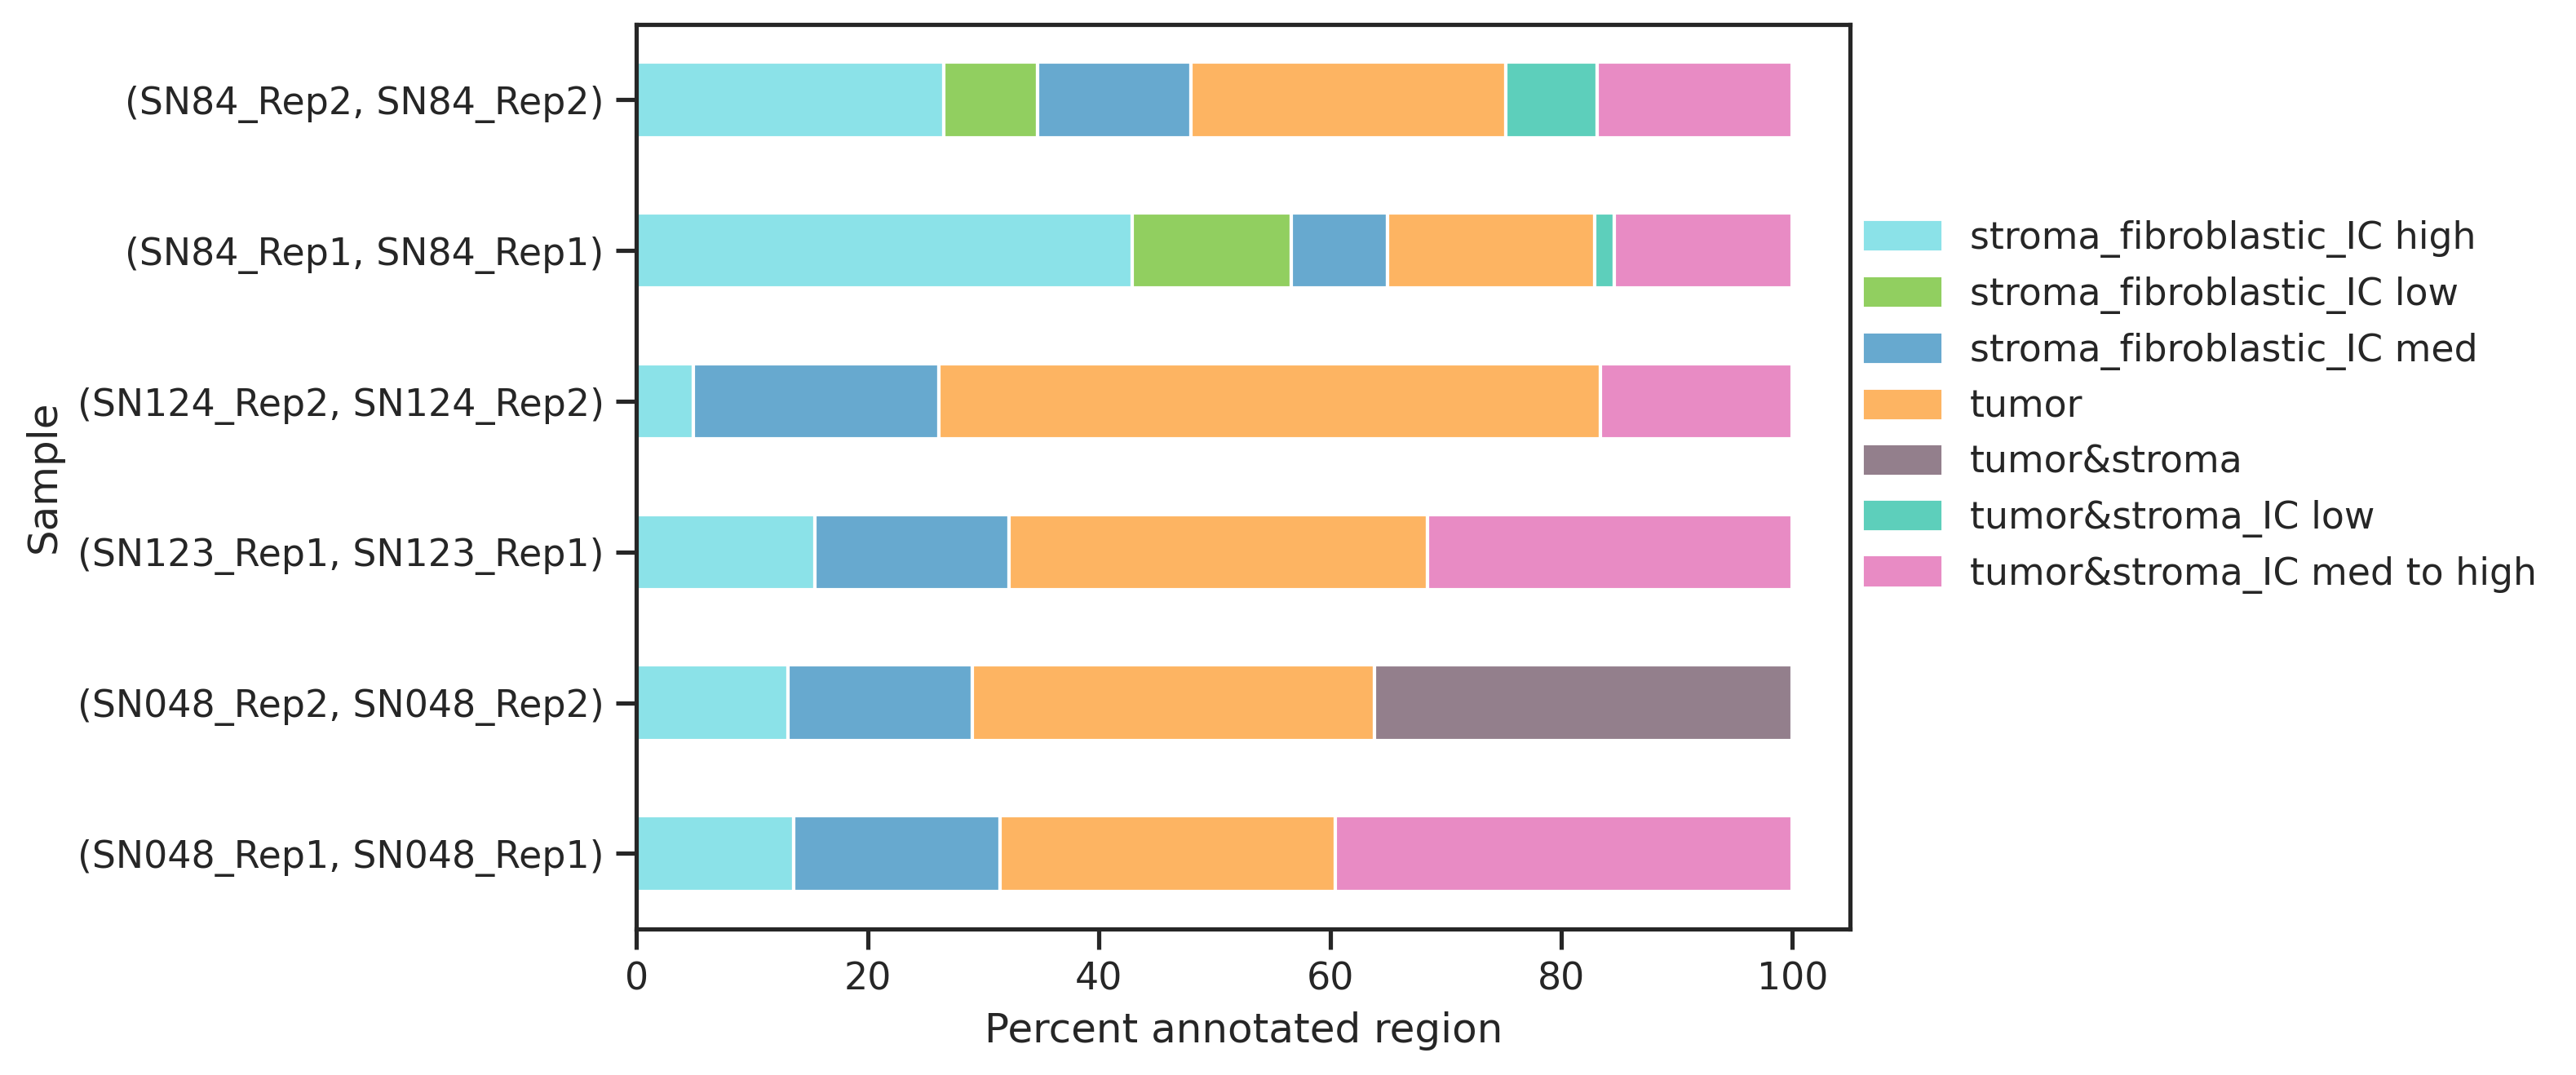

In [13]:
colors_dict = {t:general_palette_tissues_dict[t] for t in table2plot.columns}

fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

table2plot.plot.barh(stacked=True, ax=ax, color=colors_dict.values())  # , color=colors
ax.set_ylabel("Sample")
ax.set_xlabel("Percent annotated region")
ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

labels = list(colors_dict.keys())
l = [Rectangle((0, 0), 0, 0, color=color) for color in colors_dict.values()]
ax.legend(
    l,
    labels,
    loc="upper left",
    bbox_to_anchor=(1, 0.8),
    facecolor="white",
    edgecolor="white",
    ncol=1,
    borderaxespad=0.0,
    framealpha=0,
    frameon=False,
)

plt.savefig(FIG2SAVE.joinpath("sample_pathologist_annotation_proportion.pdf"), dpi=DPI, format="pdf", bbox_inches="tight")
plt.show()

## we need to remove some of the annotated regions because there are not enough spots
- IC aggregate_stroma or muscularis       2
- ""                                       1
- exclude (because this was deemed as exclude)
- tumor&stroma_IC low maybe?

In [15]:
# exclude the following annotations
df_filtered = df[~df['Pathologist Annotation grouped'].isin(['IC aggregate_stroma or muscularis',
                                                             'exclude',
                                                             'stroma_fibroblastic_IC low',
                                                             '', np.nan])].copy()
df_filtered['Pathologist Annotation grouped'].value_counts()

# potentially exclude this stroma_fibroblastic_IC low because in paper figs they do

Pathologist Annotation grouped
tumor                          1971
tumor&stroma_IC med to high    1350
stroma_fibroblastic_IC med      890
stroma_fibroblastic_IC high     768
tumor&stroma                    651
stroma_fibroblastic_IC_high     226
stroma_fibroblastic_IC_med      113
tumor&stroma_IC low              71
Name: count, dtype: int64

In [16]:
df_filtered['Pathologist Annotation grouped'].unique()

array(['tumor&stroma_IC med to high', 'tumor',
       'stroma_fibroblastic_IC high', 'stroma_fibroblastic_IC med',
       'tumor&stroma', 'tumor&stroma_IC low',
       'stroma_fibroblastic_IC_high', 'stroma_fibroblastic_IC_med'],
      dtype=object)

maybe merge some of the annotations? because some overlap?

In [17]:
# maybe merge some of the annotations? because some overlap?
df_filtered['Pathologist Annotation final'] =  df_filtered['Pathologist Annotation grouped'].map({
    'stroma_fibroblastic_IC_med': 'stroma_fibroblastic_IC med',
                                                   'stroma_fibroblastic_IC_high': 'stroma_fibroblastic_IC high',
                                                   'tumor': 'tumor',
                                                   'tumor&stroma_IC med to high': 'tumor&stroma_IC med to high',
                                                   'stroma_fibroblastic_IC med': 'stroma_fibroblastic_IC med',
                                                   'stroma_fibroblastic_IC high': 'stroma_fibroblastic_IC high',
                                                   'tumor&stroma': 'tumor&stroma',
                                                   #'stroma_fibroblastic_IC low': 'stroma_fibroblastic_IC low',
                                                   'tumor&stroma_IC low': 'tumor&stroma_IC low'
                                                  })
df_filtered['Pathologist Annotation final'].value_counts()

Pathologist Annotation final
tumor                          1971
tumor&stroma_IC med to high    1350
stroma_fibroblastic_IC med     1003
stroma_fibroblastic_IC high     994
tumor&stroma                    651
tumor&stroma_IC low              71
Name: count, dtype: int64

In [18]:
df_filtered['Pathologist Annotation final'].unique()

array(['tumor&stroma_IC med to high', 'tumor',
       'stroma_fibroblastic_IC high', 'stroma_fibroblastic_IC med',
       'tumor&stroma', 'tumor&stroma_IC low'], dtype=object)

#### check if regions have all samples: we can see that some regions don't have all 4 samples
#### maybe exlucde regions that have less than 3 or 2 samples?

In [19]:
# check if regions have all samples: we can see that some regions don't have all 4 samples
# maybe exlucde regions that have less than 3 samples?
tmp = df_filtered.groupby(['Pathologist Annotation final',
                                         'Sample']).size().reset_index()
tmp = tmp[tmp[0]!=0].groupby('Pathologist Annotation final').size().reset_index()
tmp

Pathologist Annotation final  0
0  stroma_fibroblastic_IC high  6
1   stroma_fibroblastic_IC med  6
2                        tumor  6
3                 tumor&stroma  1
4          tumor&stroma_IC low  2
5  tumor&stroma_IC med to high  5

In [20]:
# check if regions have all samples: we can see that some regions don't have all 4 samples
# maybe exlucde regions that have less than 3 samples?
print("these regions should be removed as they have less than 2/3 samples", tmp[tmp[0]<2])

these regions should be removed as they have less than 2/3 samples   Pathologist Annotation final  0
3                 tumor&stroma  1


In [21]:
df_filtered_regions = df_filtered[~df_filtered['Pathologist Annotation final'].isin(
    
    tmp[tmp[0]<2]['Pathologist Annotation final'])].copy()

In [22]:
df_filtered_regions['Pathologist Annotation final'].value_counts()

Pathologist Annotation final
tumor                          1971
tumor&stroma_IC med to high    1350
stroma_fibroblastic_IC med     1003
stroma_fibroblastic_IC high     994
tumor&stroma_IC low              71
Name: count, dtype: int64

#### normalise mRNA abundance of cell types across spots by cell type for each sample?
for each sample: 
    * each cell type: normalise spots by max mRNA abundance of that cell type for example

In [23]:
normalised_sample_dict = dict()
for sample in df_filtered_regions.Sample.unique():
    sample_df = df_filtered_regions[
        df_filtered_regions['Sample']==sample].loc[:, celltype_list]/df_filtered_regions[
        df_filtered_regions['Sample']==sample].loc[:, celltype_list].max(axis=0) # max
    sample_df = sample_df.merge(df_filtered_regions[['Sample', 'Pathologist Annotation final']],
                                left_index=True,
                                right_index=True,
                                how='left')
    normalised_sample_dict[sample] = sample_df

In [24]:
normalised_results = pd.concat(normalised_sample_dict.values())
normalised_results.head(3)

B  C1QC Mac   C3 iCAF  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.015209  0.005291  0.001208   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.019011  0.116402  0.001208   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000000  0.000220  0.000000   

                                              CD4 Tfh    CD4 Th  CD4 Th HSP  \
spot_id                                                                       
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.009412  0.096774    0.038123   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.021176  0.080645    0.029326   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000000  0.000000    0.002933   

                                             CD4 Th17    CD4 Tn   CD8 Tem  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.087059  0.056180  0.016854   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.021176  0.044944  0.028090   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000000  0.000000  0.002809   

                                             CD8 Tem HSP  ...       UPR  \
spot_id                                                   ...             
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1     0.030556  ...  0.006785   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1     0.036111  ...  0.004097   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1     0.002778  ...  0.000512   

                                                 cDC1      cDC2       gdT  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.011456  0.002179  0.029144   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.100716  0.005991  0.018215   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000955  0.000545  0.000000   

                                                ipEMT     migDC       pDC  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.060065  0.022917  0.003367   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.246672  0.015625  0.008418   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000215  0.002083  0.001684   

                                                 pEMT  \
spot_id                                                 
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.069815   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.005951   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000076   

                                                               Sample  \
spot_id                                                                 
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   

                                             Pathologist Annotation final  
spot_id                                                                    
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1   tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1   tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1   tumor&stroma_IC med to high  

[3 rows x 58 columns]

## 1. subset to create plots and contain all "filtered" regions

In [25]:
### subset to create plots
normalised_results_subset = normalised_results.loc[:, ['pEMT', 'ipEMT', 'Stem', 'Stem (NOTUM high)',
                                                   'Sample', 'Pathologist Annotation final'
                                                  ]].copy()
normalised_results_subset.head(3)

pEMT     ipEMT      Stem  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.069815  0.060065  0.005304   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.005951  0.246672  0.014255   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000076  0.000215  0.000663   

                                             Stem (NOTUM high)  \
spot_id                                                          
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1           0.012185   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1           0.271258   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1           0.000795   

                                                               Sample  \
spot_id                                                                 
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   

                                            Pathologist Annotation final  
spot_id                                                                   
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  tumor&stroma_IC med to high

In [26]:
normalised_results_subset.rename(columns={'pEMT': 'REC',
                                  'ipEMT': 'iREC',
                                  'Stem (NOTUM high)': 'Stem NOTUM'
                                 }, inplace=True)

In [27]:
normalised_results_subset_copy = normalised_results_subset.reset_index()

# Melt the DataFrame
#normalised_results_subset_copy = normalised_results_subset.reset_index()
melted_df = pd.melt(normalised_results_subset_copy, id_vars=['spot_id', 
                                                             'Sample', 
                                                             'Pathologist Annotation final'], 
                    value_vars=['REC', 'iREC', 'Stem', 'Stem NOTUM'],
                    var_name='Celltype', value_name='Normalised abundance')
melted_df.head(3)

spot_id                    Sample  \
0  Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
1  Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
2  Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   

  Pathologist Annotation final Celltype  Normalised abundance  
0  tumor&stroma_IC med to high      REC              0.069815  
1  tumor&stroma_IC med to high      REC              0.005951  
2  tumor&stroma_IC med to high      REC              0.000076

In [29]:
palette_tissues_dict = {
    'tumor&stroma_IC med to high':'#E88BC4',
    'tumor':'#FDB462', #'#5DCFBB',
    'stroma_fibroblastic_IC high':'#8BE2E8',
    'stroma_fibroblastic_IC med':'#67A9CF',##5DCFBB
    'tumor&stroma_IC low':'#5DCFBB' #67A9CF
}

palette_cancer_states_dict = {
    'REC': '#fb9a99',
    'iREC': '#e31a1c',
    'Stem': '#a6cee3',
    'Stem NOTUM': '#1f78b4',
 }

## 2. We could also only keep the tumour regions and see in there

In [36]:
df_filtered_regions['Pathologist Annotation final'].value_counts()

Pathologist Annotation final
tumor                          1971
tumor&stroma_IC med to high    1350
stroma_fibroblastic_IC med     1003
stroma_fibroblastic_IC high     994
tumor&stroma_IC low              71
Name: count, dtype: int64

In [37]:
df_filtered_regions_remove_stroma = df_filtered_regions[~df_filtered_regions['Pathologist Annotation final'].isin(
['stroma_fibroblastic_IC high', 'stroma_fibroblastic_IC med'])].copy()

In [38]:
normalised_sample_dict_stroma = dict()
for sample in df_filtered_regions_remove_stroma.Sample.unique():
    sample_df_stroma = df_filtered_regions_remove_stroma[
        df_filtered_regions_remove_stroma['Sample']==sample].loc[:, celltype_list]/df_filtered_regions_remove_stroma[
        df_filtered_regions_remove_stroma['Sample']==sample].loc[:, celltype_list].max(axis=0) # max
    sample_df_stroma = sample_df_stroma.merge(df_filtered_regions_remove_stroma[['Sample', 'Pathologist Annotation final']],
                                left_index=True,
                                right_index=True,
                                how='left')
    normalised_sample_dict_stroma[sample] = sample_df_stroma

In [39]:
normalised_results_tumour = pd.concat(normalised_sample_dict_stroma.values())
normalised_results_tumour['Pathologist Annotation final'].value_counts()

Pathologist Annotation final
tumor                          1971
tumor&stroma_IC med to high    1350
tumor&stroma_IC low              71
Name: count, dtype: int64

In [40]:
### subset to create plots
normalised_results_tumour_subset = normalised_results_tumour.loc[:, ['pEMT', 'ipEMT', 'Stem', 'Stem (NOTUM high)',
                                                   'Sample', 'Pathologist Annotation final'
                                                  ]].copy()
normalised_results_tumour_subset.head(3)

pEMT     ipEMT      Stem  \
spot_id                                                                     
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  0.069815  0.060065  0.005304   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  0.005951  0.246672  0.014255   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  0.000076  0.000215  0.000663   

                                             Stem (NOTUM high)  \
spot_id                                                          
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1           0.012185   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1           0.271258   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1           0.000795   

                                                               Sample  \
spot_id                                                                 
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   

                                            Pathologist Annotation final  
spot_id                                                                   
Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  tumor&stroma_IC med to high  
Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  tumor&stroma_IC med to high

In [41]:
normalised_results_tumour_subset.rename(columns={'pEMT': 'REC',
                                  'ipEMT': 'iREC',
                                  'Stem (NOTUM high)': 'Stem NOTUM'
                                 }, inplace=True)

In [42]:
normalised_results_tumour_subset_copy = normalised_results_tumour_subset.reset_index()

# Melt the DataFrame
#normalised_results_subset_copy = normalised_results_subset.reset_index()
melted_df_tumour = pd.melt(normalised_results_tumour_subset_copy, id_vars=['spot_id', 
                                                             'Sample', 
                                                             'Pathologist Annotation final'], 
                    value_vars=['REC', 'iREC', 'Stem', 'Stem NOTUM'],
                    var_name='Celltype', value_name='Normalised abundance')
melted_df_tumour.head(5)

spot_id                    Sample  \
0  Count_SN048_A416371_Rep1_AAACAAGTATCTCCCA-1  Count_SN048_A416371_Rep1   
1  Count_SN048_A416371_Rep1_AAACACCAATAACTGC-1  Count_SN048_A416371_Rep1   
2  Count_SN048_A416371_Rep1_AAACAGAGCGACTCCT-1  Count_SN048_A416371_Rep1   
3  Count_SN048_A416371_Rep1_AAACAGCTTTCAGAAG-1  Count_SN048_A416371_Rep1   
4  Count_SN048_A416371_Rep1_AAACCGGGTAGGTACC-1  Count_SN048_A416371_Rep1   

  Pathologist Annotation final Celltype  Normalised abundance  
0  tumor&stroma_IC med to high      REC              0.069815  
1  tumor&stroma_IC med to high      REC              0.005951  
2  tumor&stroma_IC med to high      REC              0.000076  
3                        tumor      REC              0.001602  
4  tumor&stroma_IC med to high      REC              0.004578

In [43]:
melted_df_tumour['Pathologist Annotation final'].unique()

array(['tumor&stroma_IC med to high', 'tumor', 'tumor&stroma_IC low'],
      dtype=object)

In [44]:
palette_tumour_dict = {
    'tumor&stroma_IC med to high':'#E88BC4',
    'tumor':'#FDB462', #'#5DCFBB',
    'tumor&stroma_IC low':'#5DCFBB'#'#67A9CF'
}

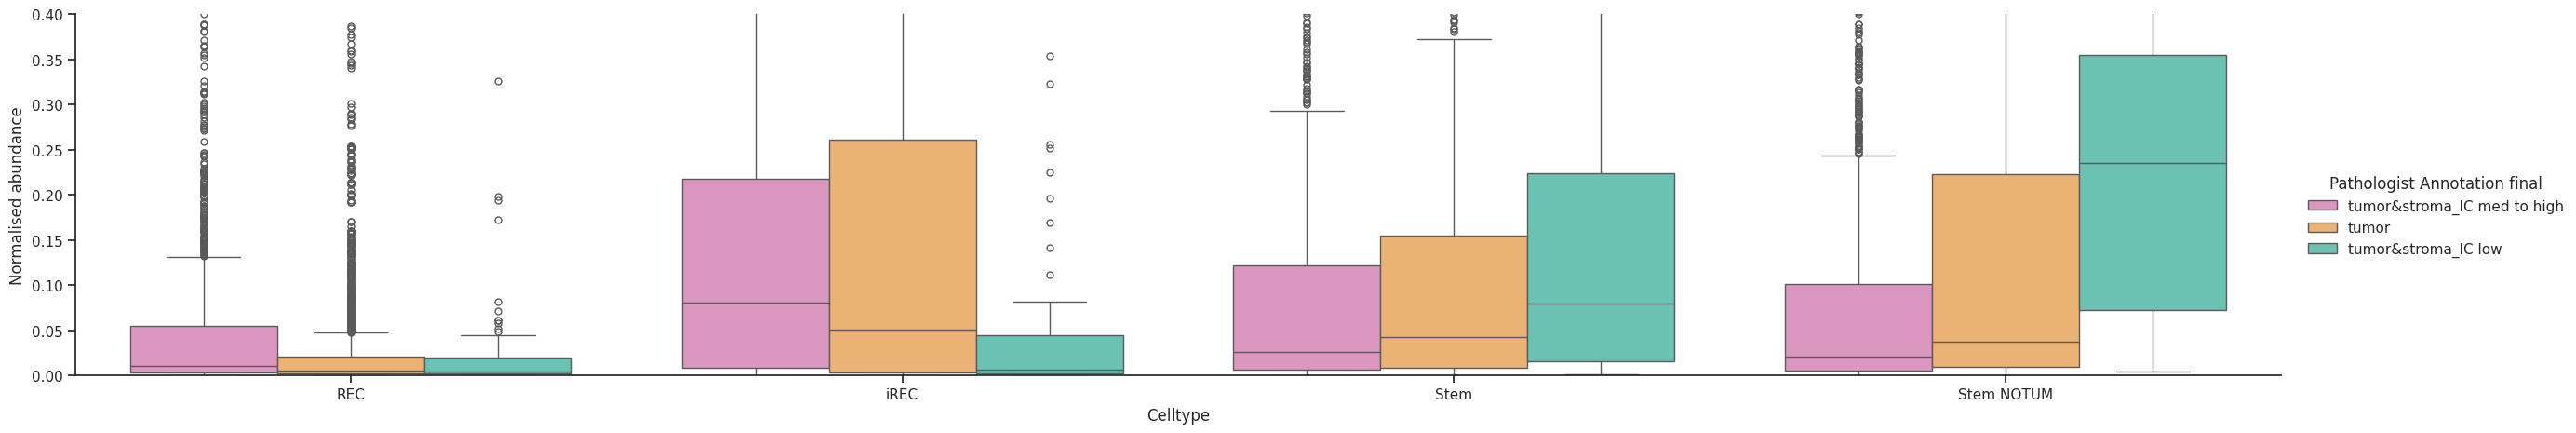

In [45]:
import seaborn as sns
sns.catplot(data=melted_df_tumour, 
            x="Celltype", 
            y="Normalised abundance", 
            hue="Pathologist Annotation final", 
            kind="box",
            height=5, aspect=5,
            palette=palette_tumour_dict.values(),
           )
plt.ylim((0,0.4))
plt.savefig(
    f"{FIG2SAVE}/iRECs_stem_abundance_pathological_annotations_tumour_regions_only.pdf",
    bbox_inches="tight",
    facecolor='white'
)
plt.show()

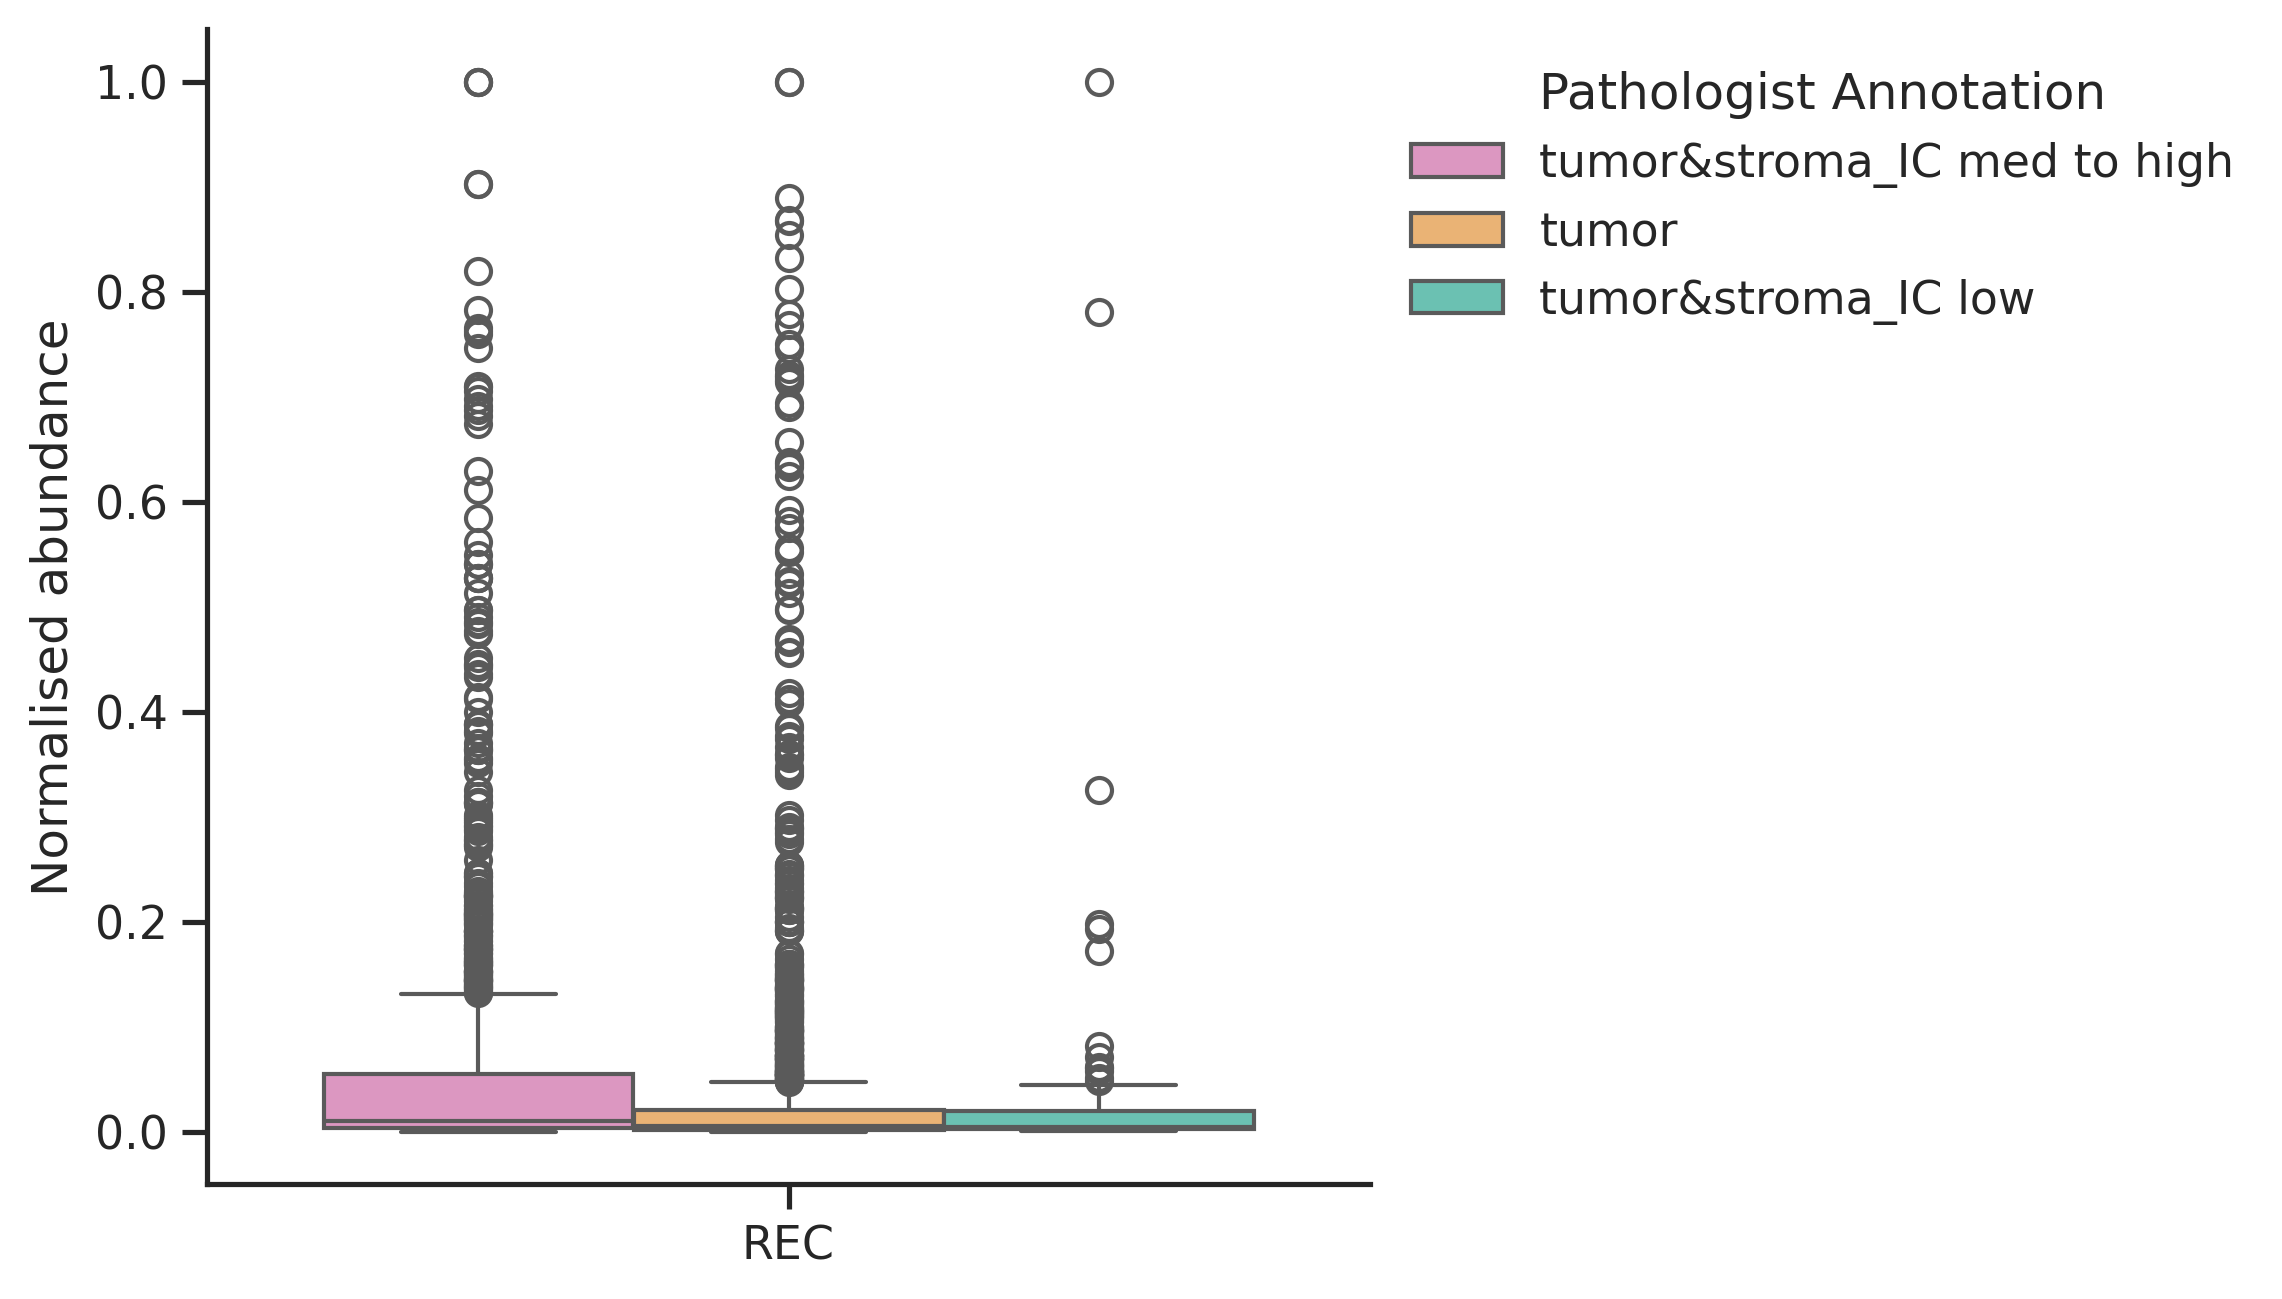

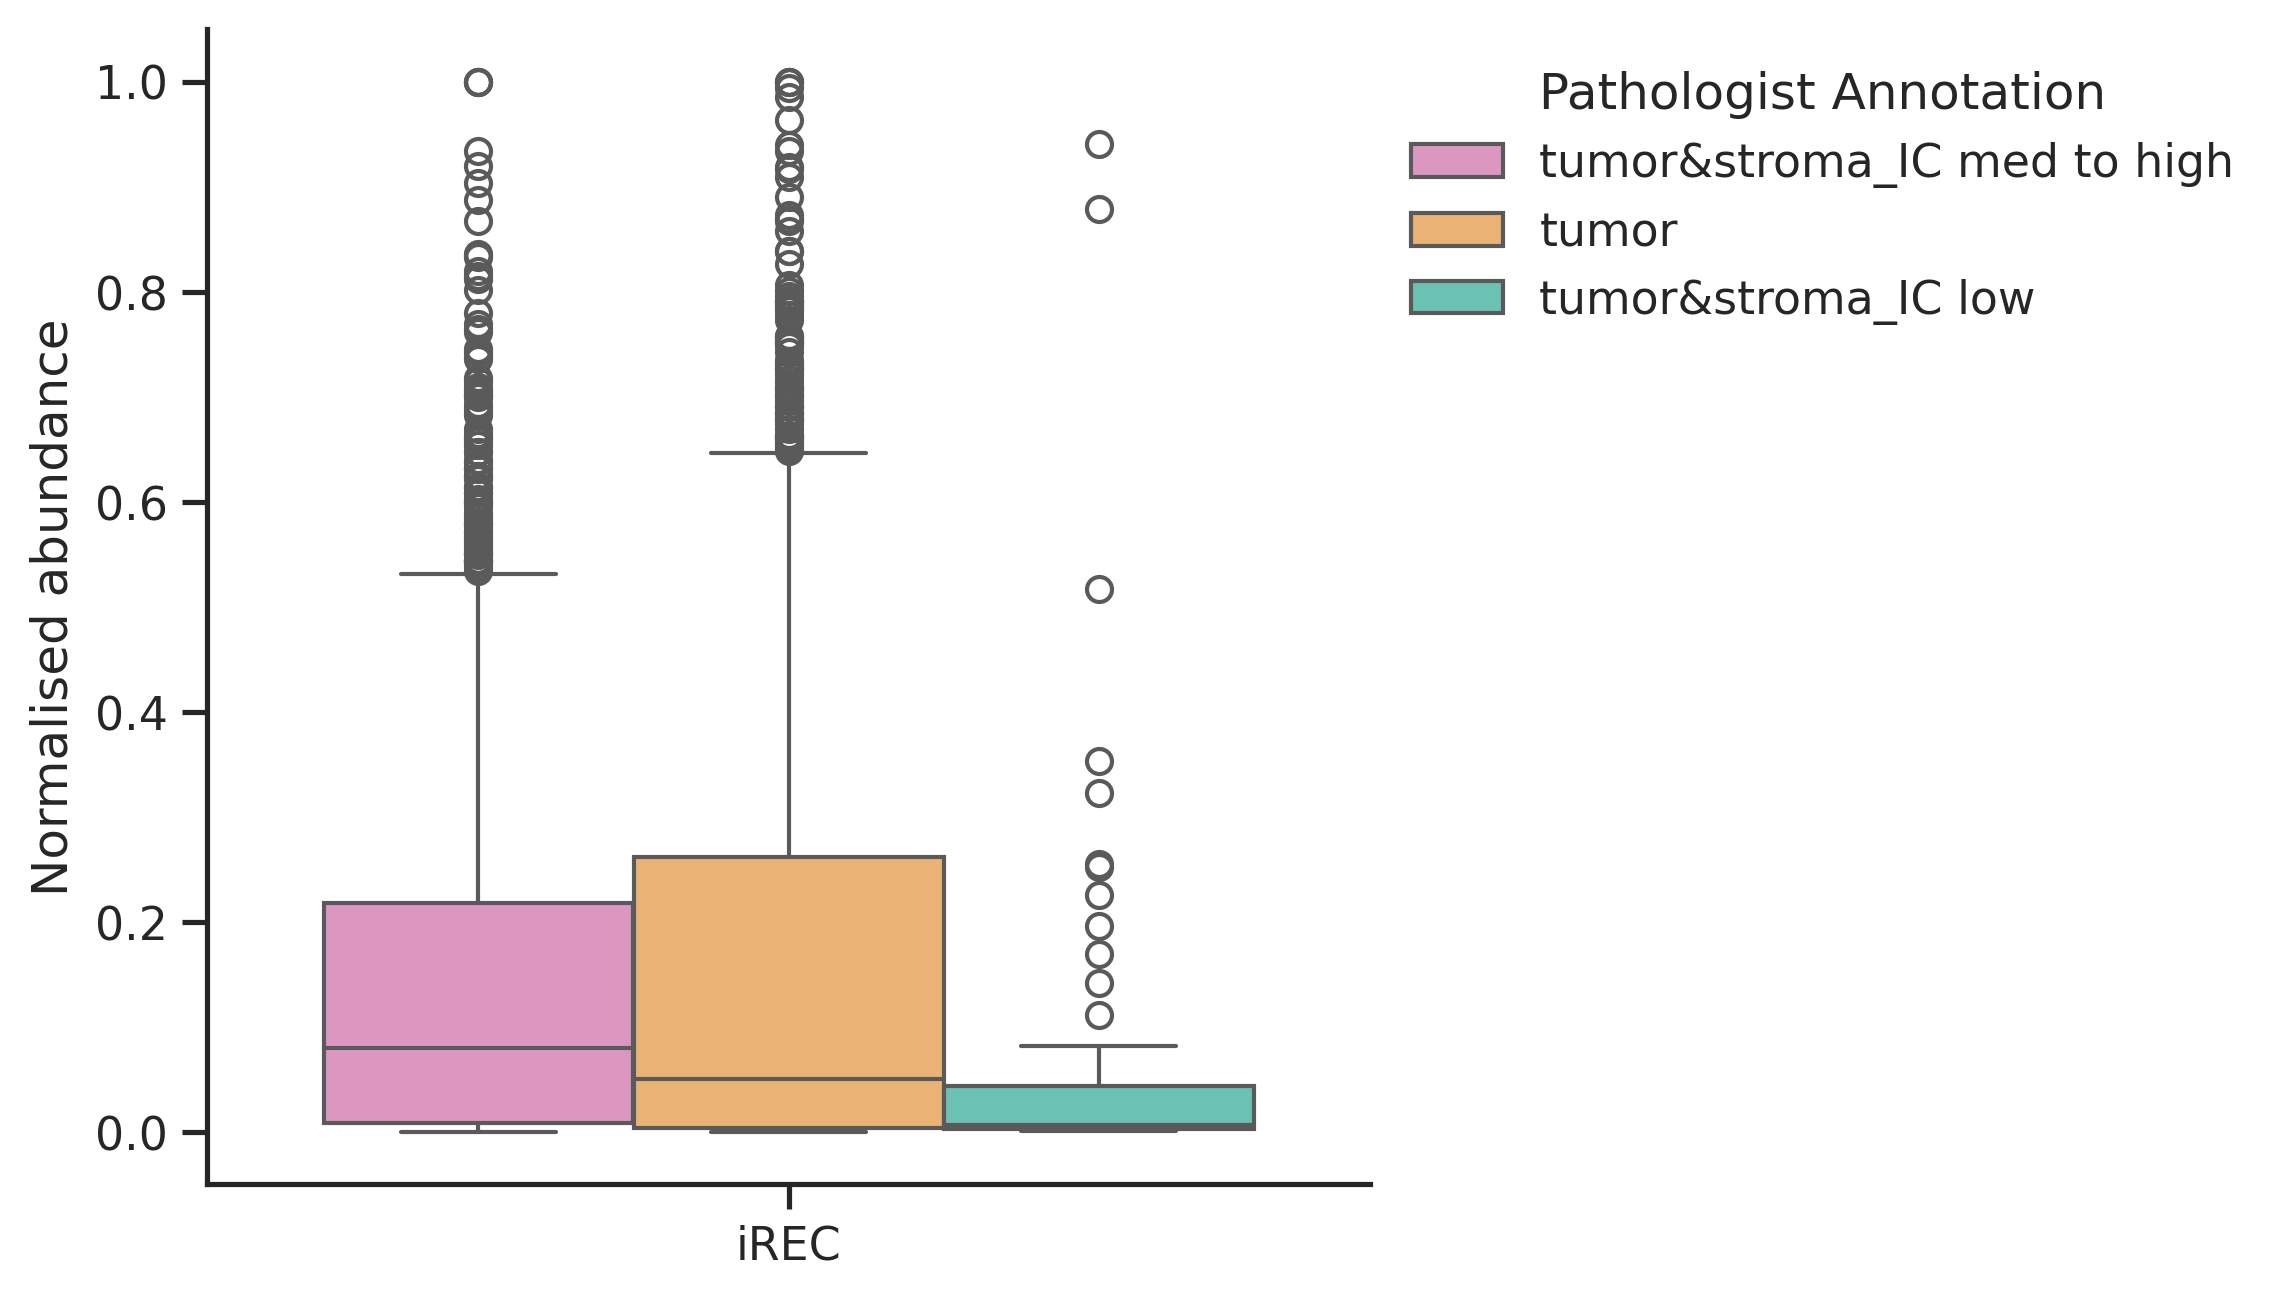

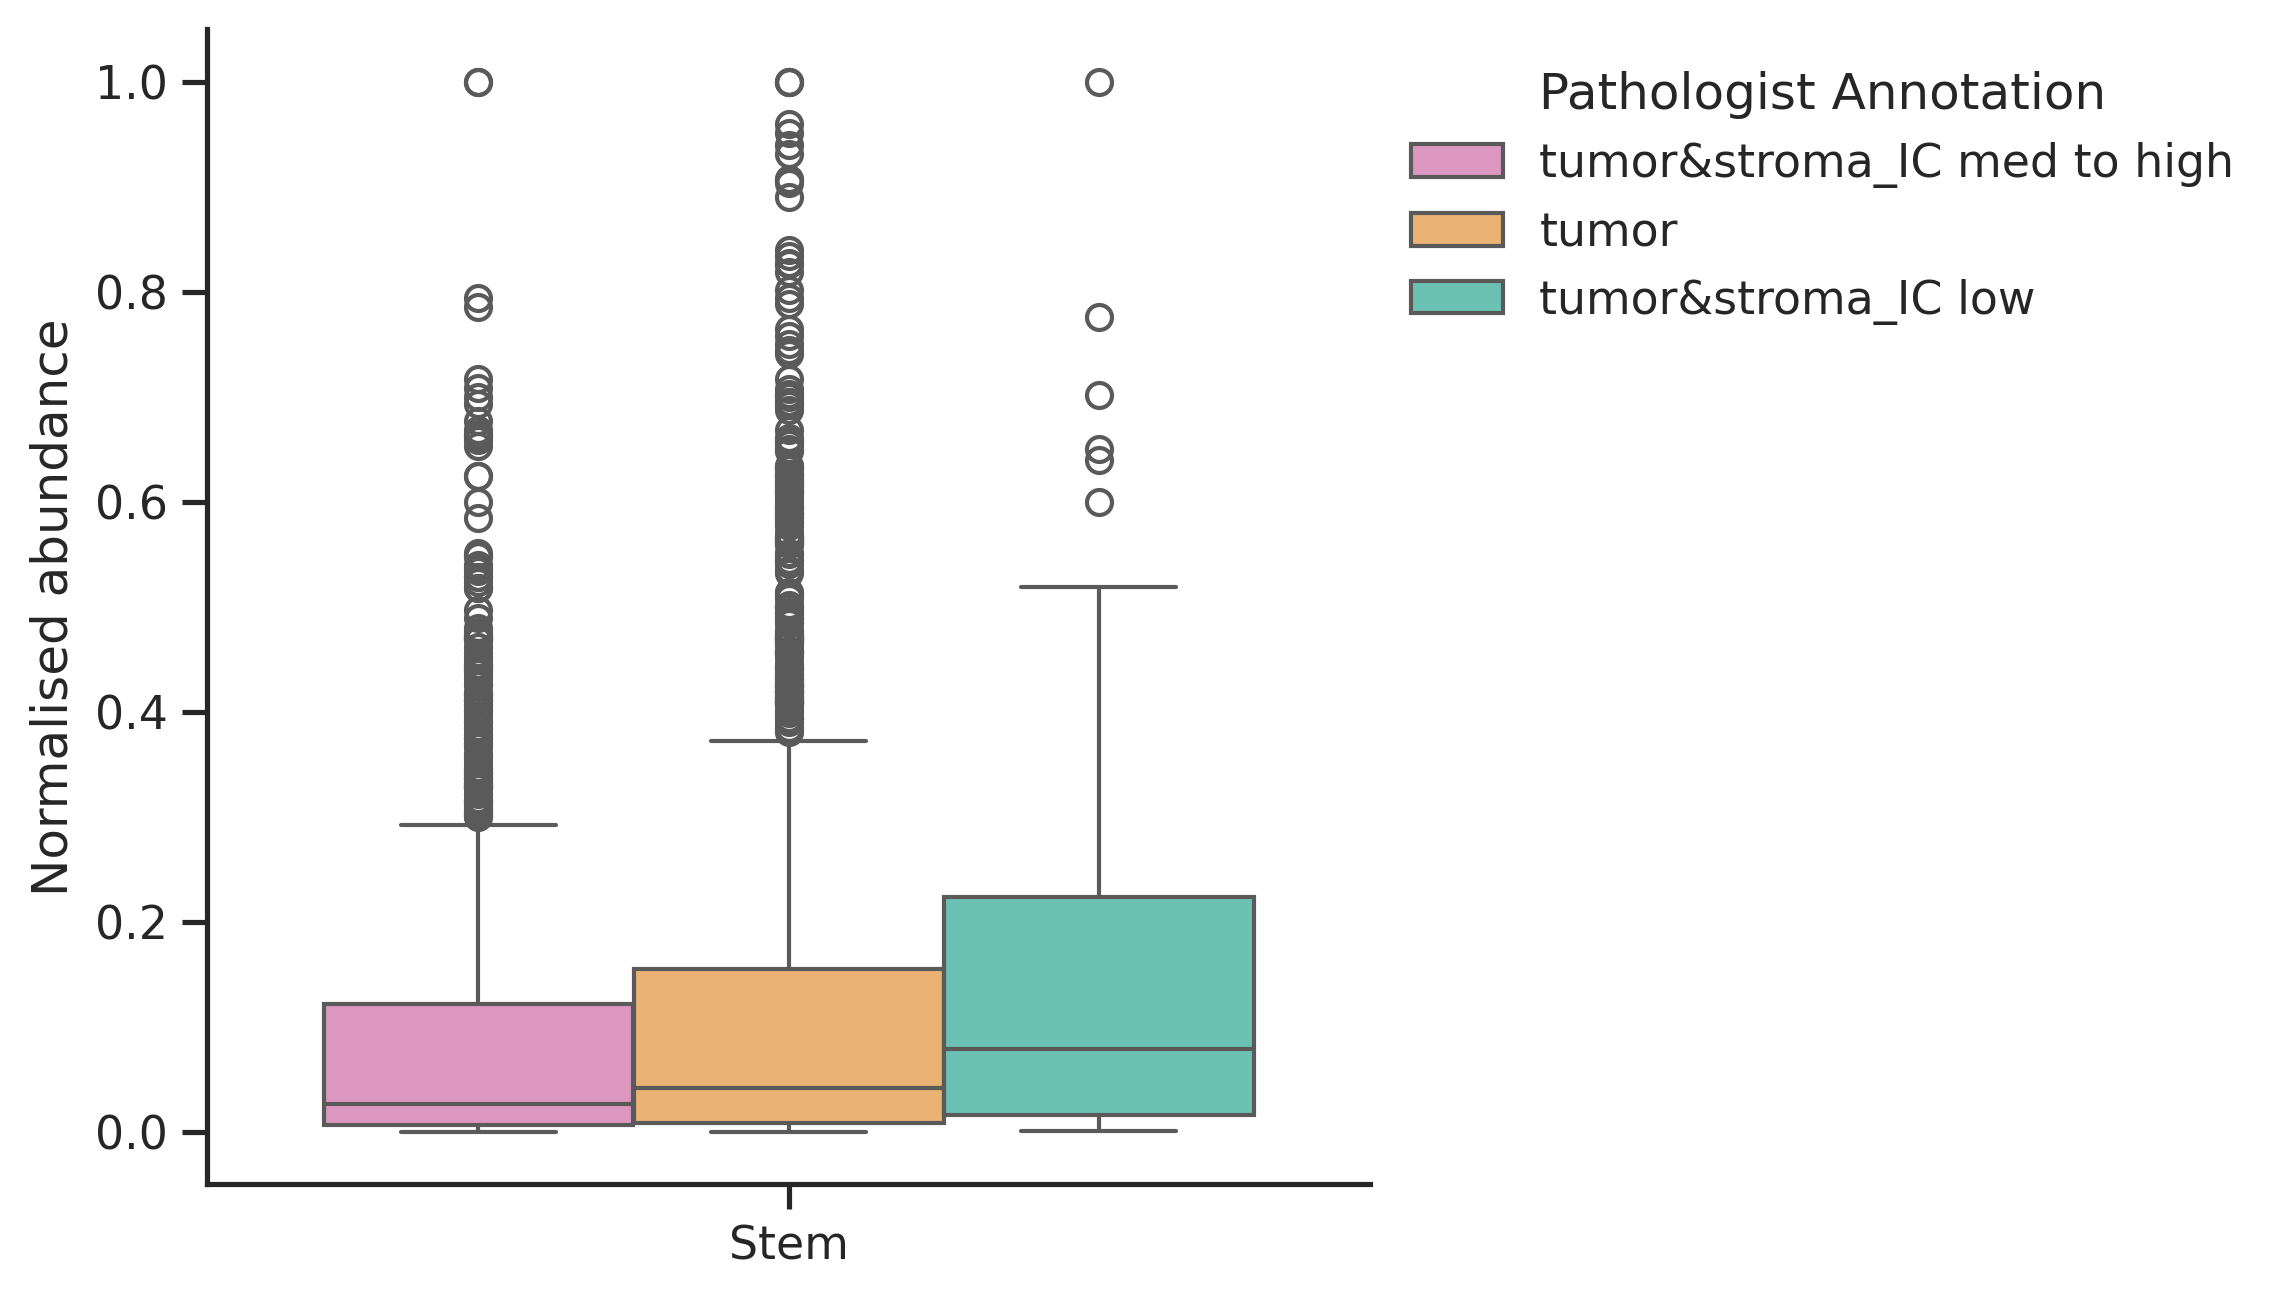

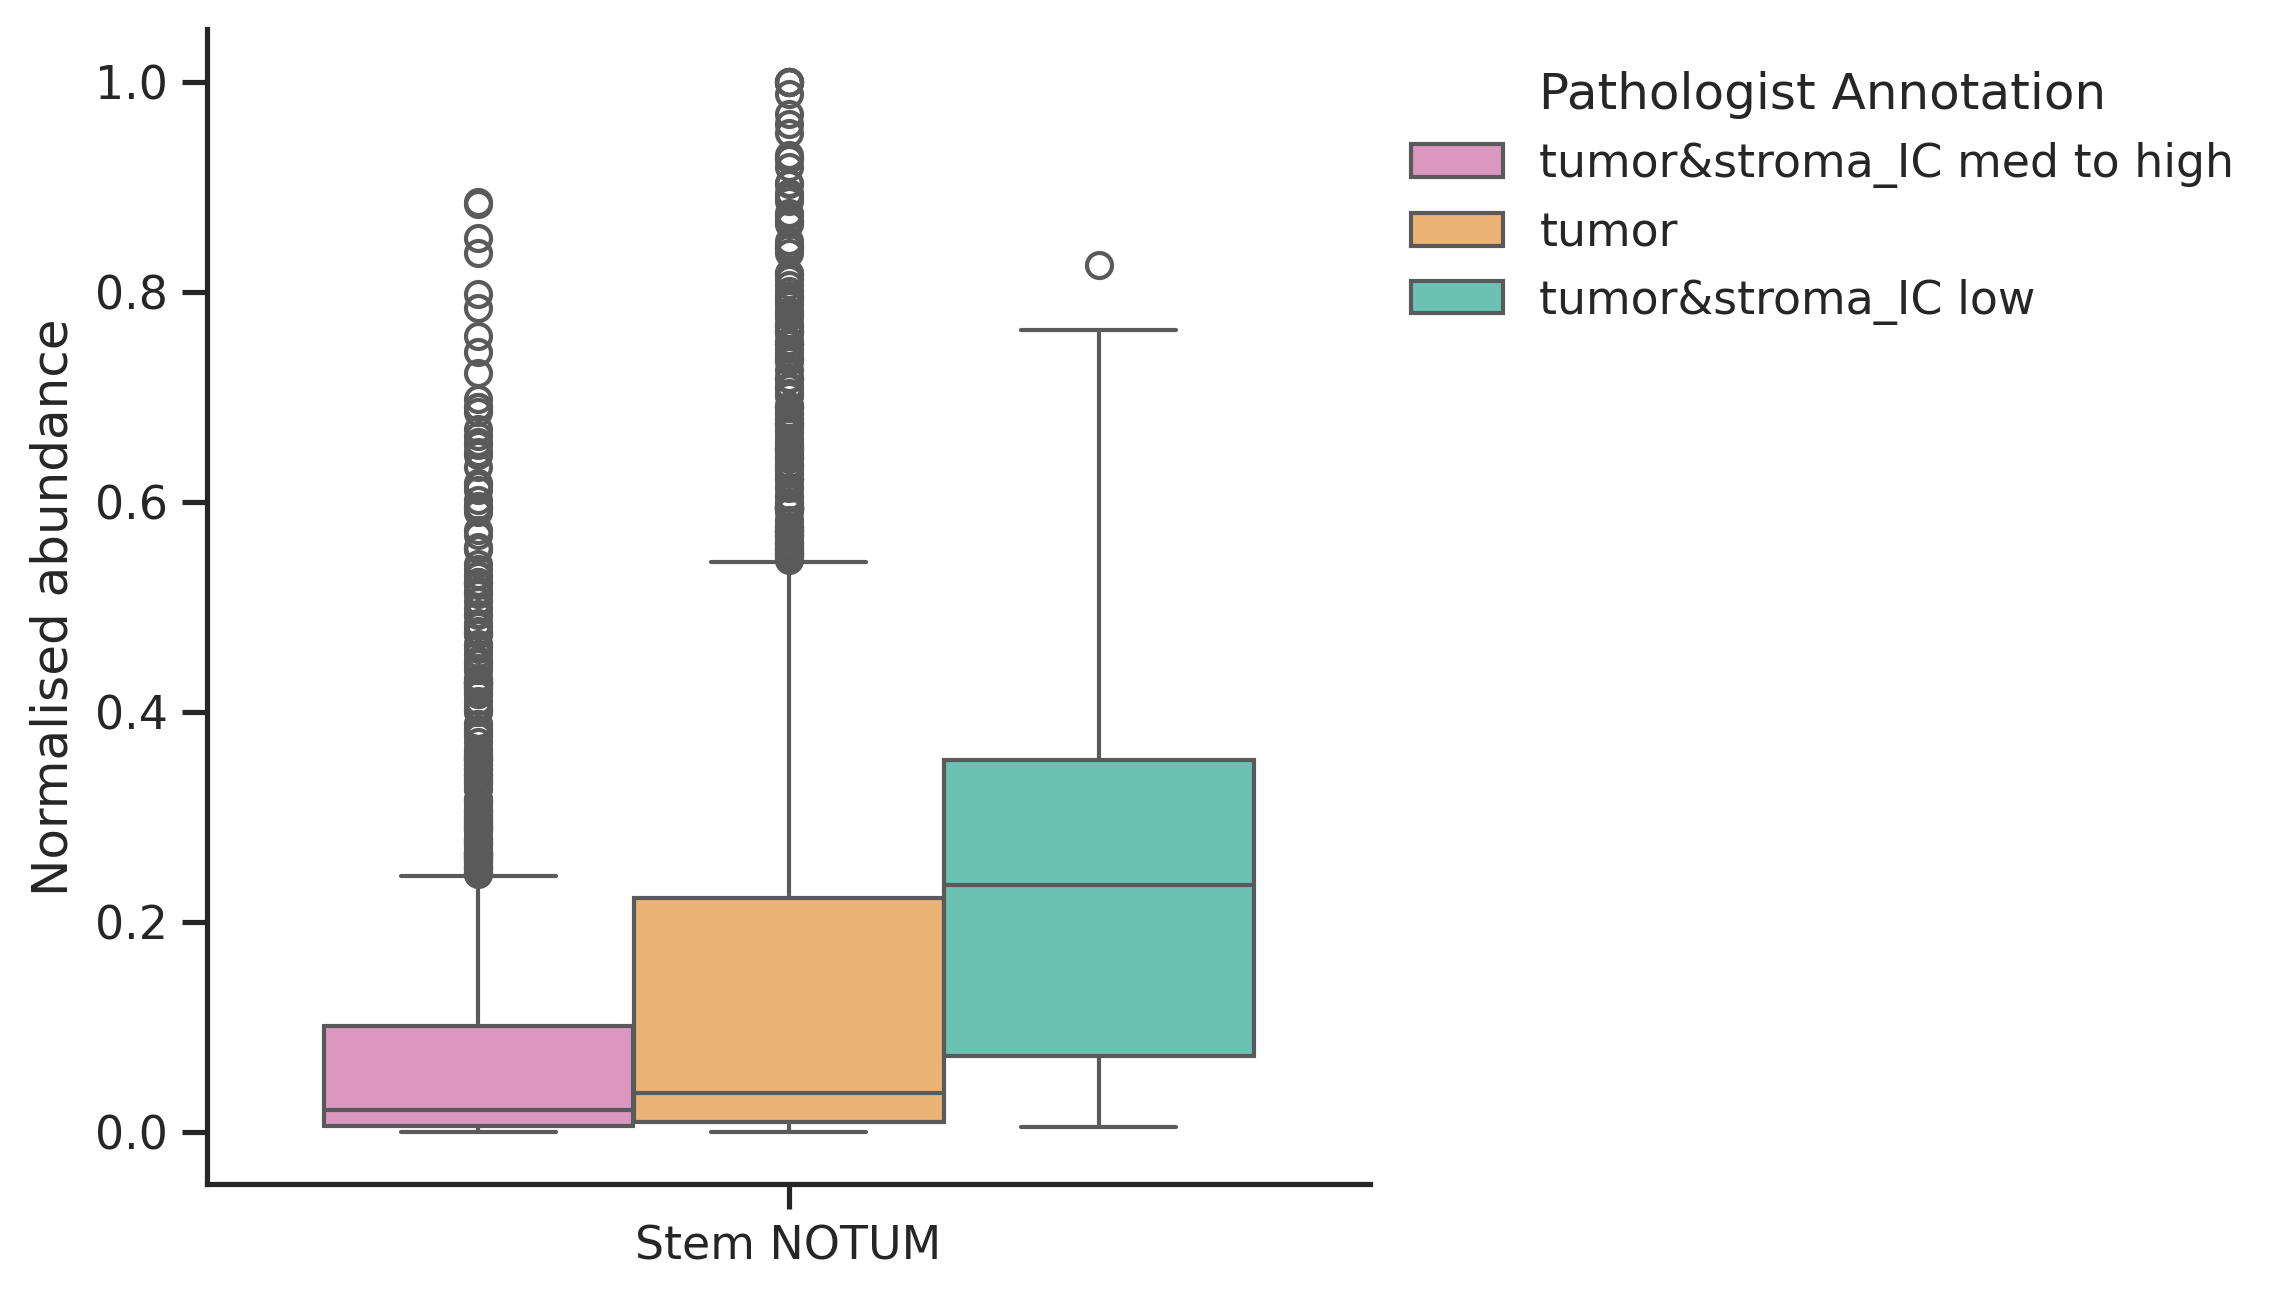

In [46]:
for c in melted_df_tumour.Celltype.unique():
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(5,5))
    
    sns.boxplot(data=melted_df_tumour[melted_df_tumour['Celltype']==c],
                x="Celltype",
                y="Normalised abundance", 
                hue="Pathologist Annotation final", 
                palette=palette_tumour_dict.values(),
                ax=ax
               )
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
    sns.despine()
    ax.set_xlabel("")
    
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Pathologist Annotation")
    legend.set_frame_on(False)
    
    fig.savefig(FIG2SAVE.joinpath(f"iRECs_stem_abundance_pathological_annotations_tumour_regions_only_{c}.pdf"), 
                dpi=DPI, 
                format="pdf",
                bbox_inches="tight")
    plt.show()

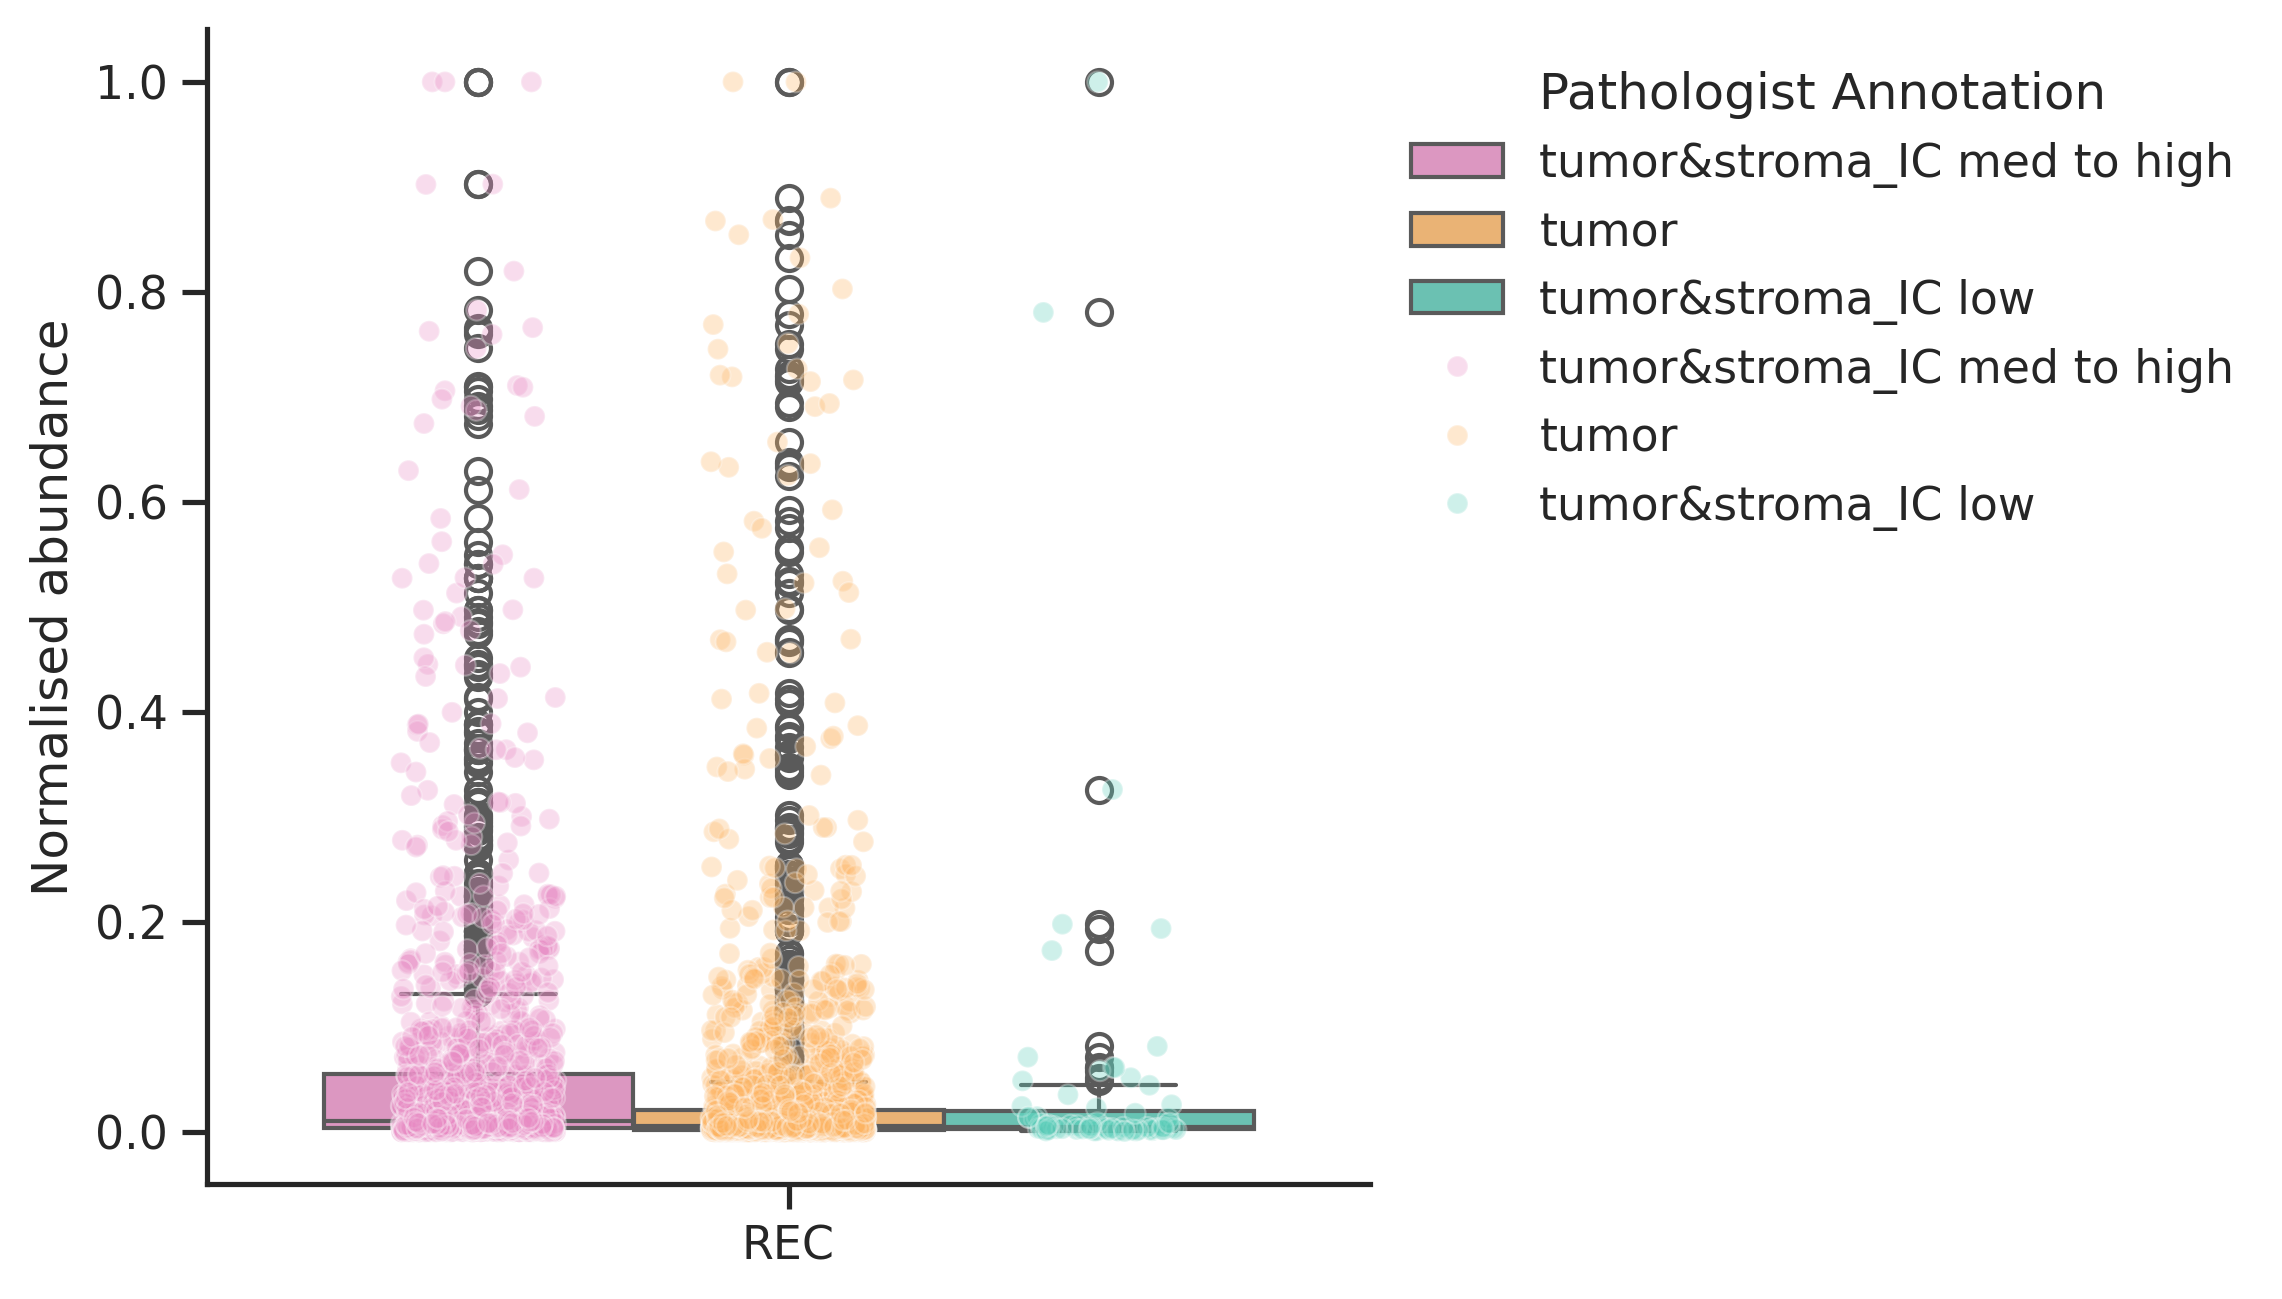

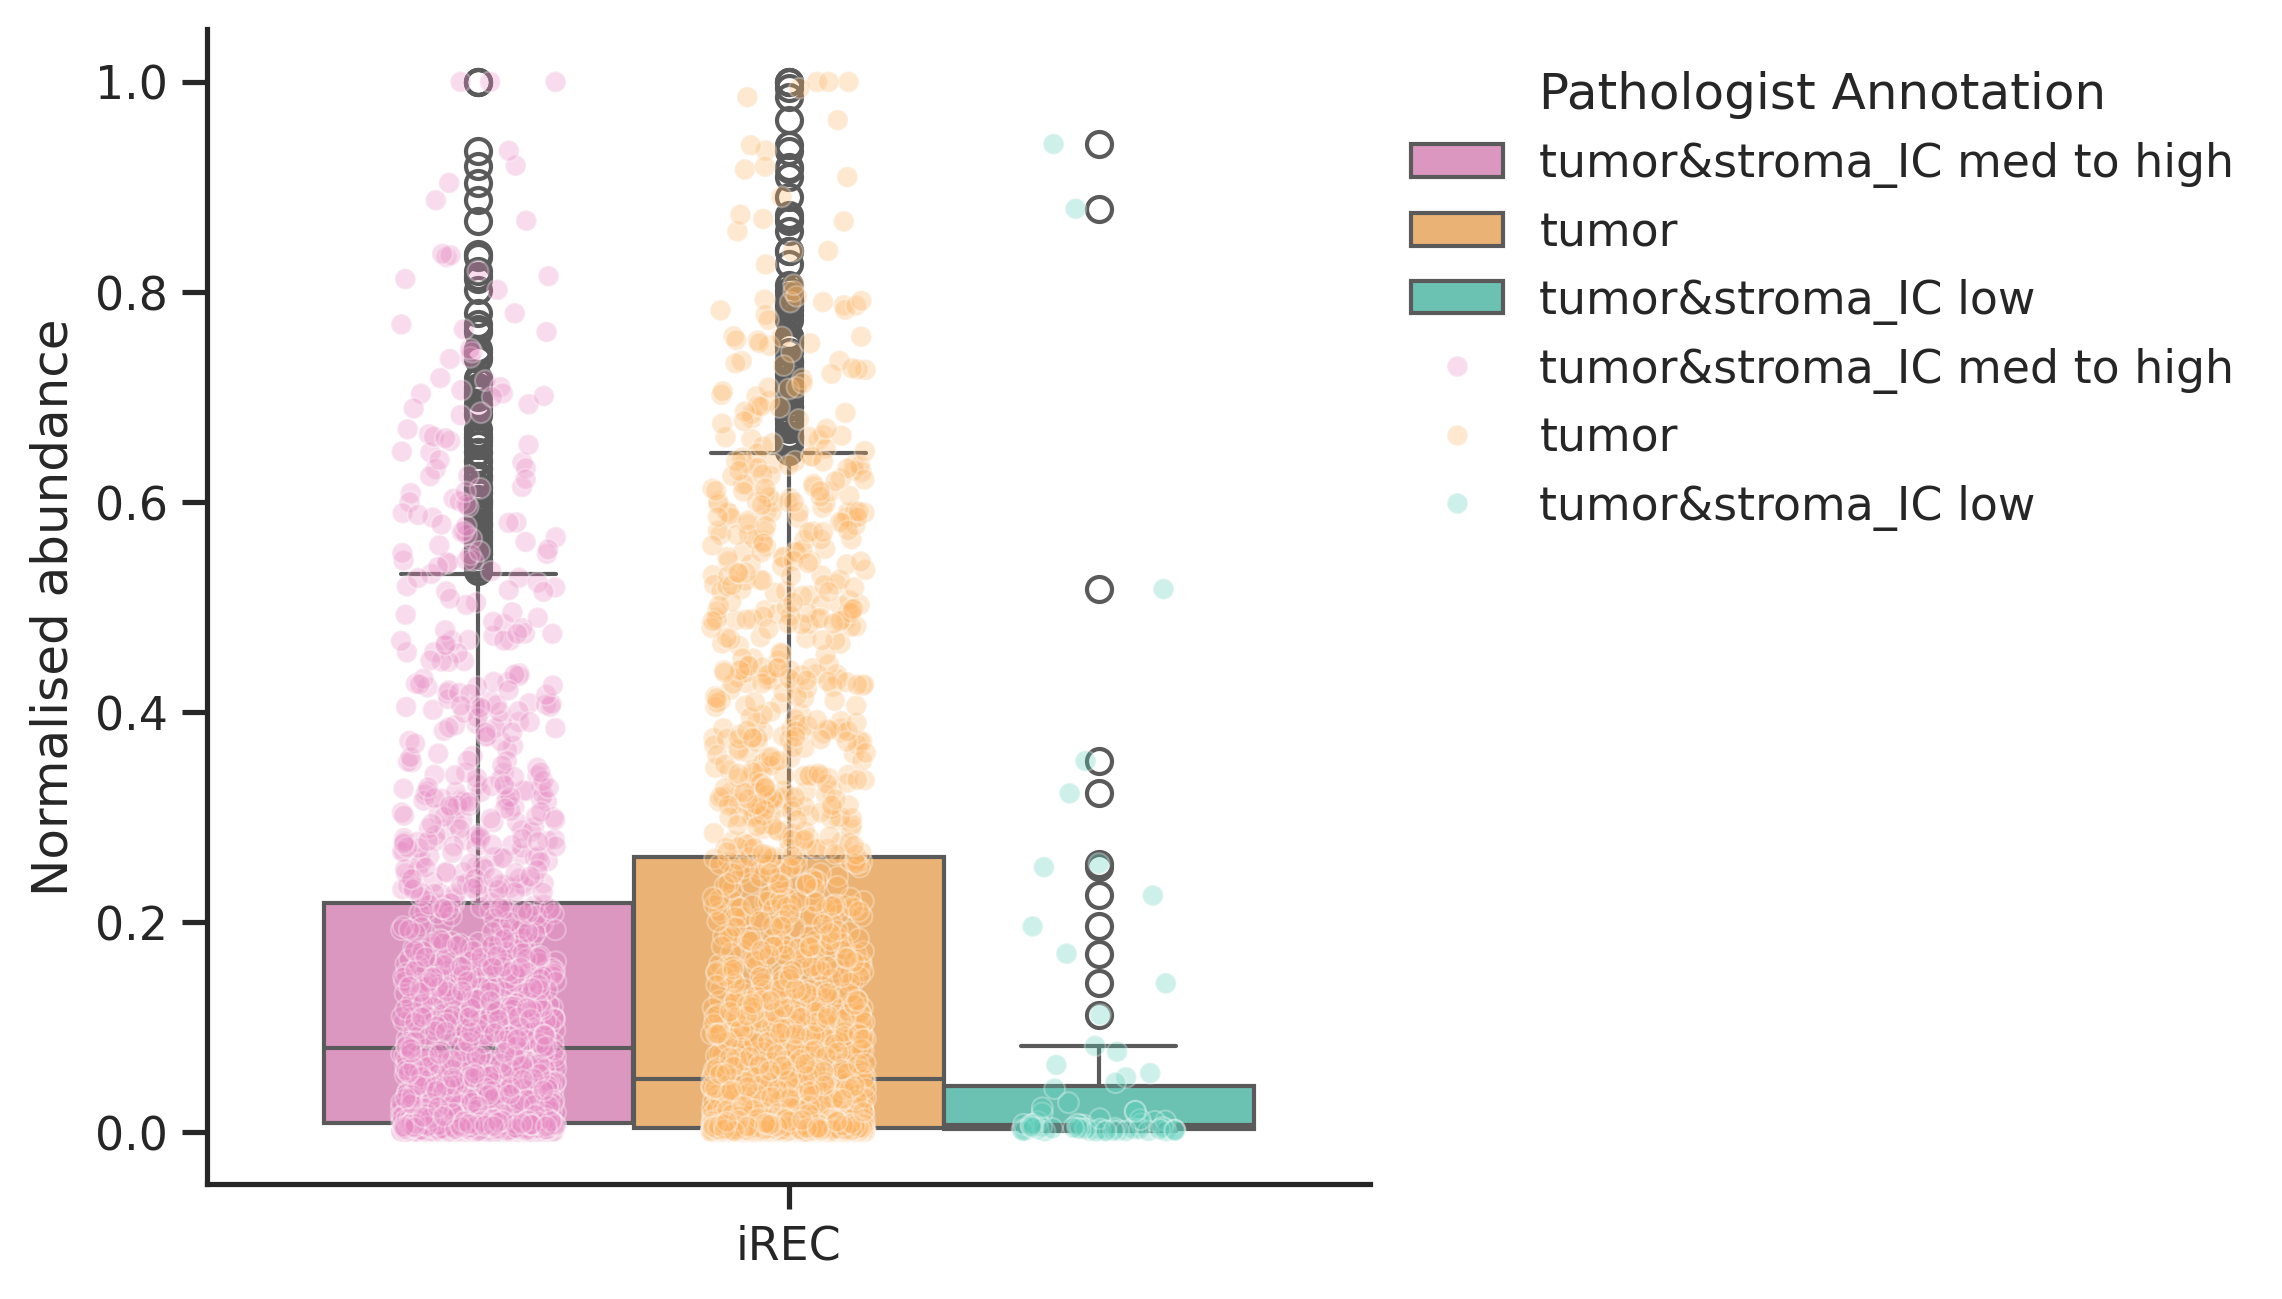

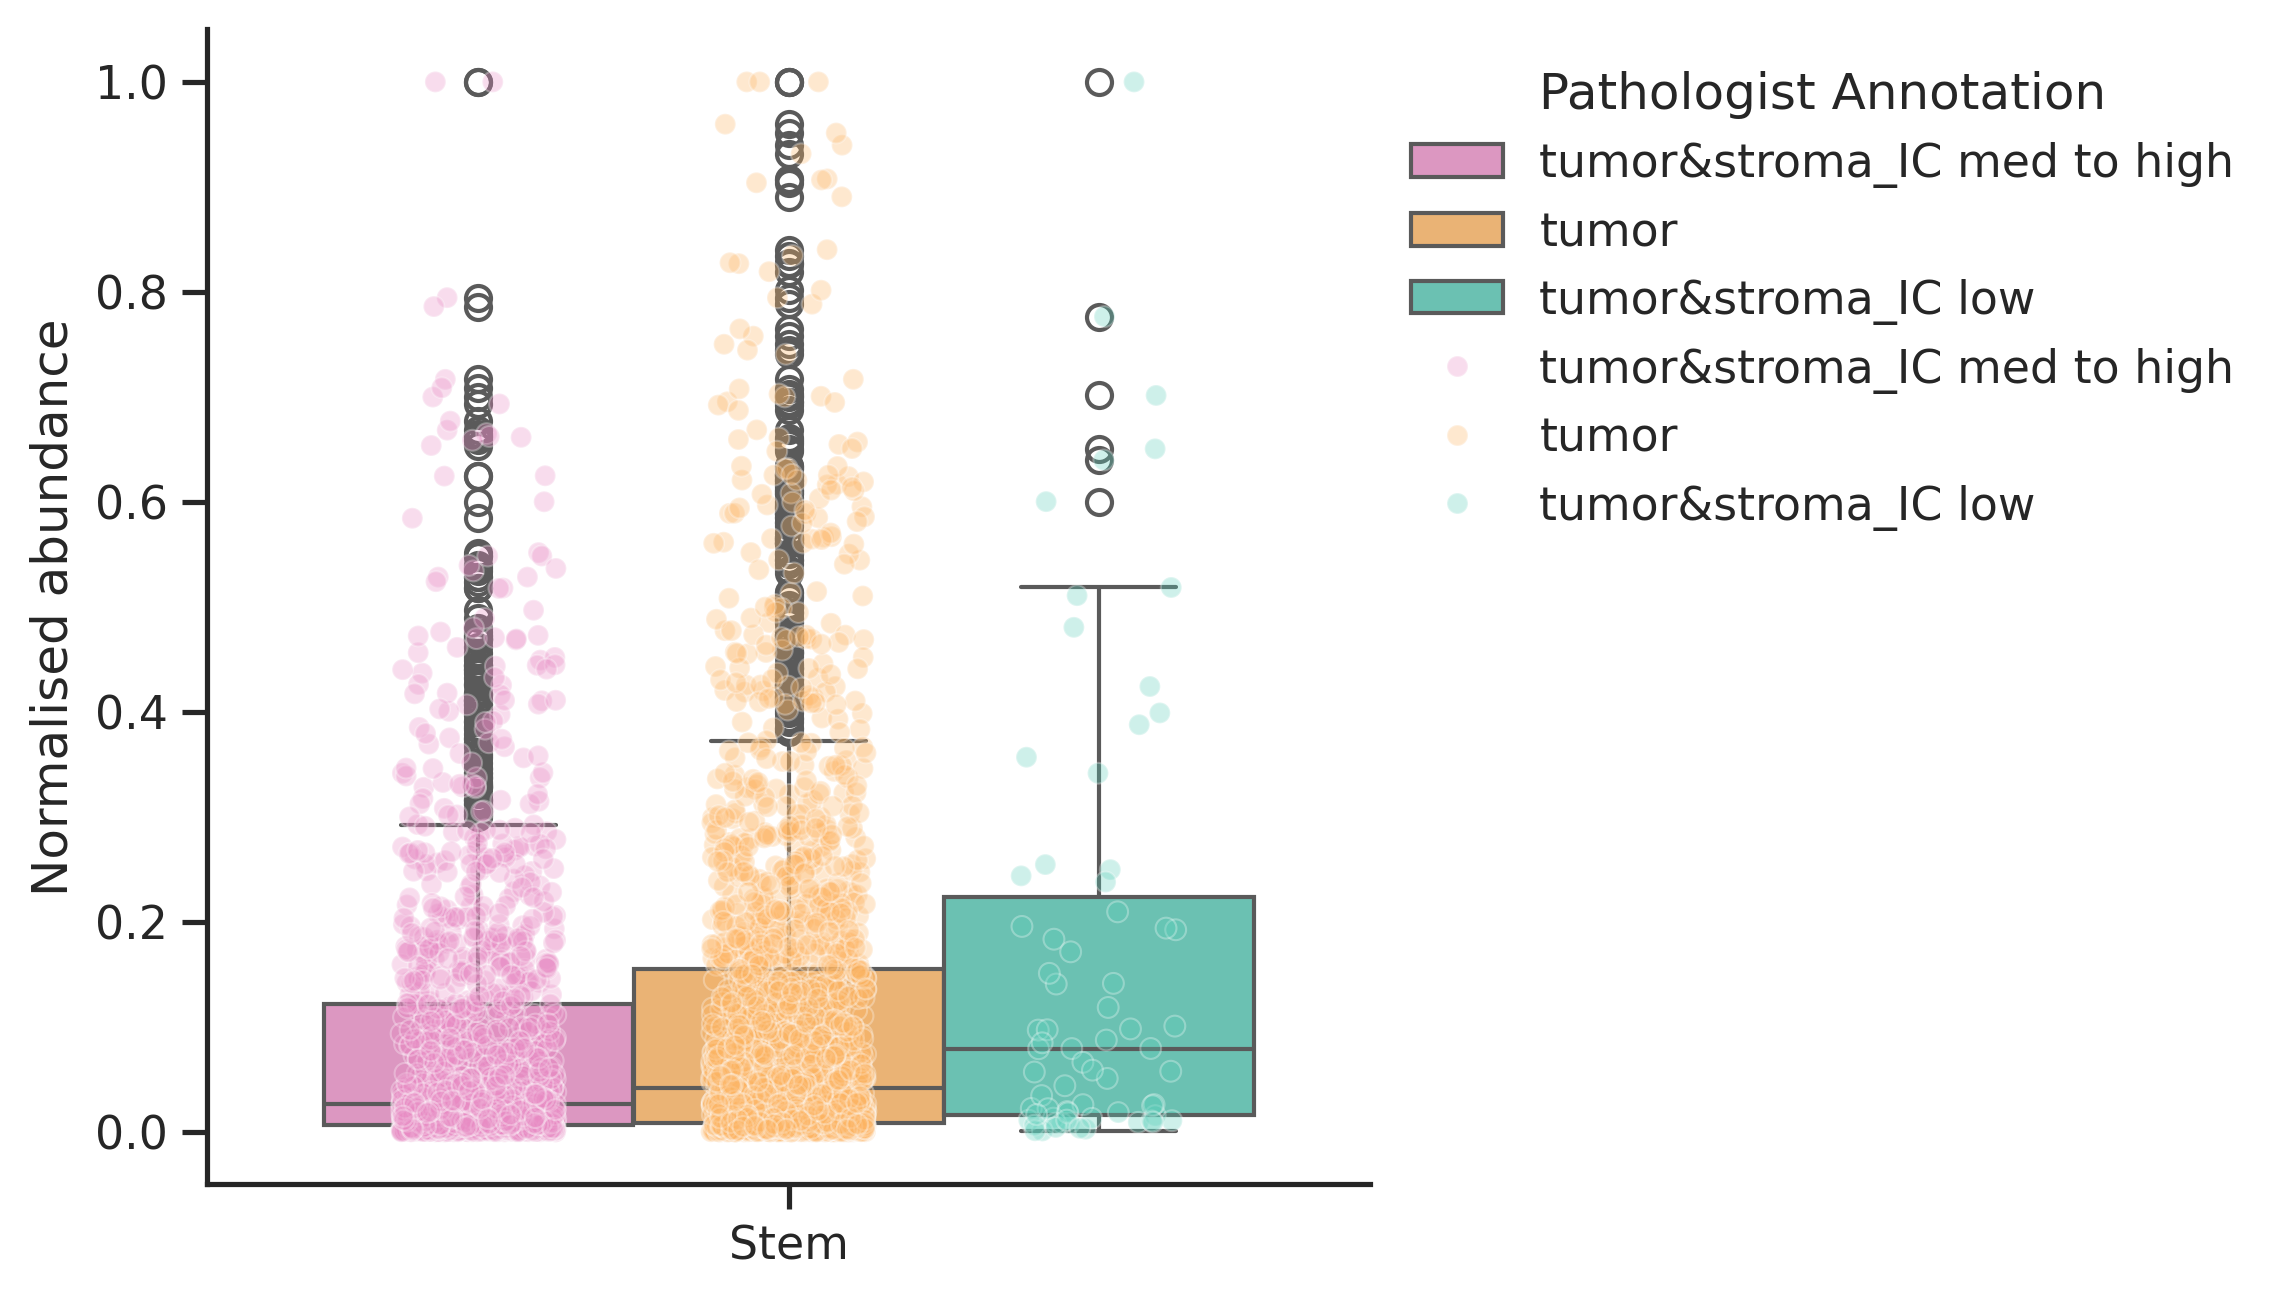

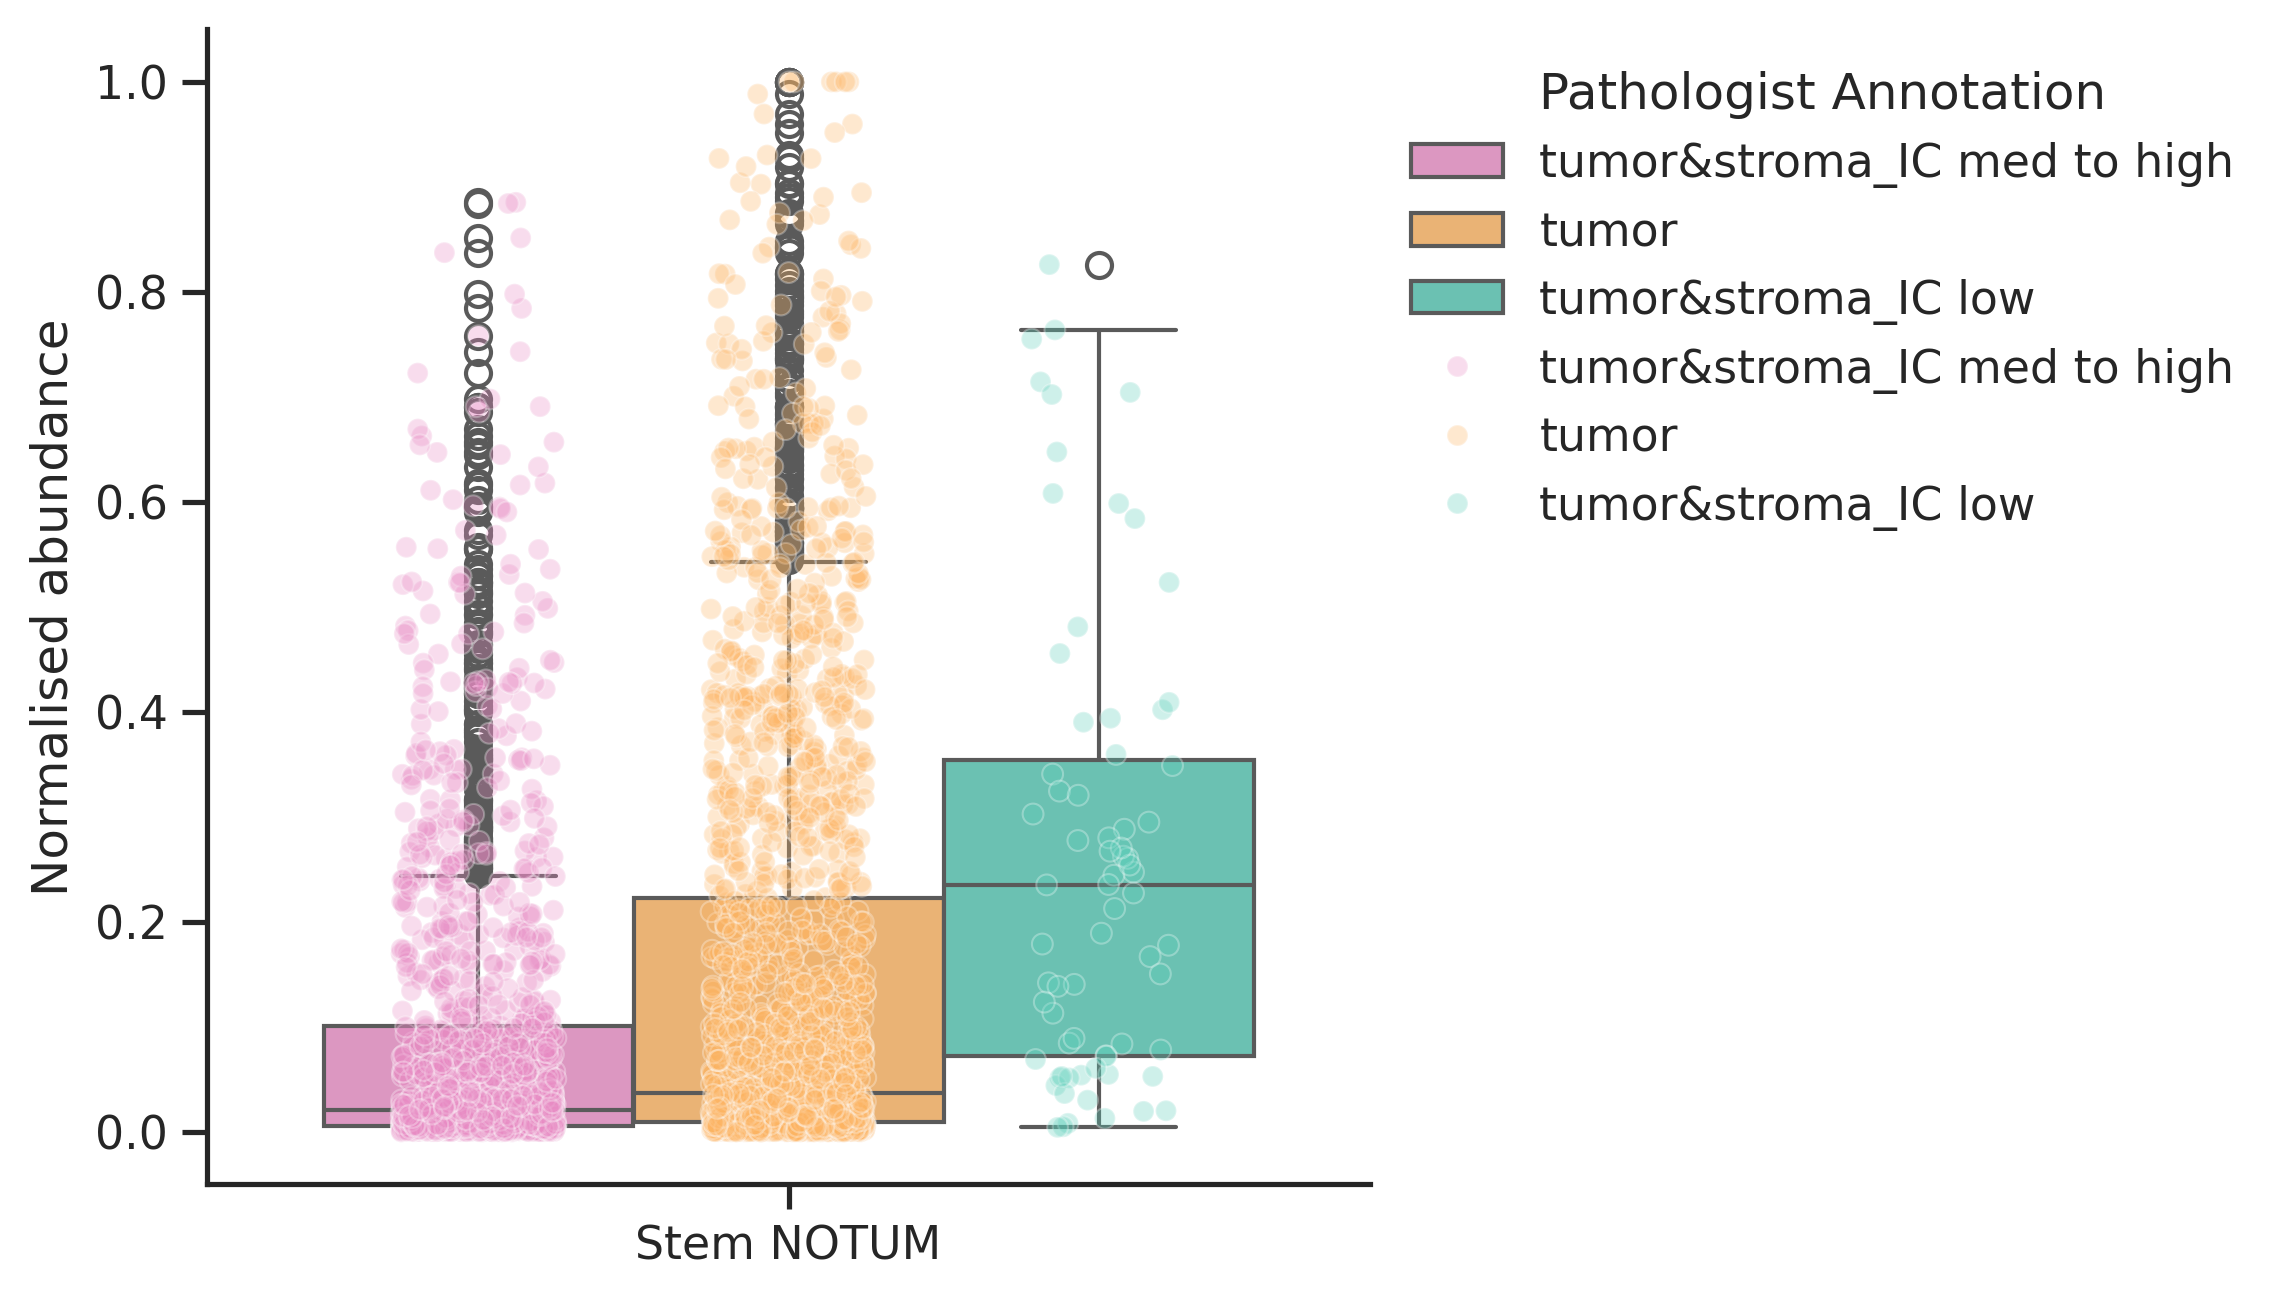

In [48]:
for c in melted_df_tumour.Celltype.unique():
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(5,5))
    
    sns.boxplot(data=melted_df_tumour[melted_df_tumour['Celltype']==c],
                x="Celltype",
                y="Normalised abundance", 
                hue="Pathologist Annotation final", 
                palette=palette_tumour_dict.values(),
                ax=ax
               )
    
    sns.stripplot(x='Celltype', y="Normalised abundance",  #stripplot
                  hue="Pathologist Annotation final", 
                  dodge=True, jitter=0.2, edgecolor='white', linewidth=0.5, size=5,
                  palette=palette_tumour_dict.values(), 
                  data=melted_df_tumour[melted_df_tumour['Celltype']==c], 
                  alpha=0.3,
                  ax=ax)
    
    #sns.swarmplot(x='Celltype', y="Normalised abundance",  #stripplot
                  #hue="Pathologist Annotation final", 
                  #dodge=True, edgecolor='white', linewidth=0.5, size=1,
                  #palette=palette_tumour_dict.values(), 
                  #data=melted_df_tumour[melted_df_tumour['Celltype']==c], 
                  #alpha=0.5,
                  #ax=ax) 
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
    #plt.ylim((-0.19,1.02))
    sns.despine()
    
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Pathologist Annotation")
    legend.set_frame_on(False)
    
    ax.set_xlabel("")
    
    fig.savefig(FIG2SAVE.joinpath(f"iRECs_stem_abundance_pathological_annotations_tumour_regions_only_{c}_violin_points.pdf"), 
                dpi=DPI, 
                format="pdf",
                bbox_inches="tight")
    plt.show()

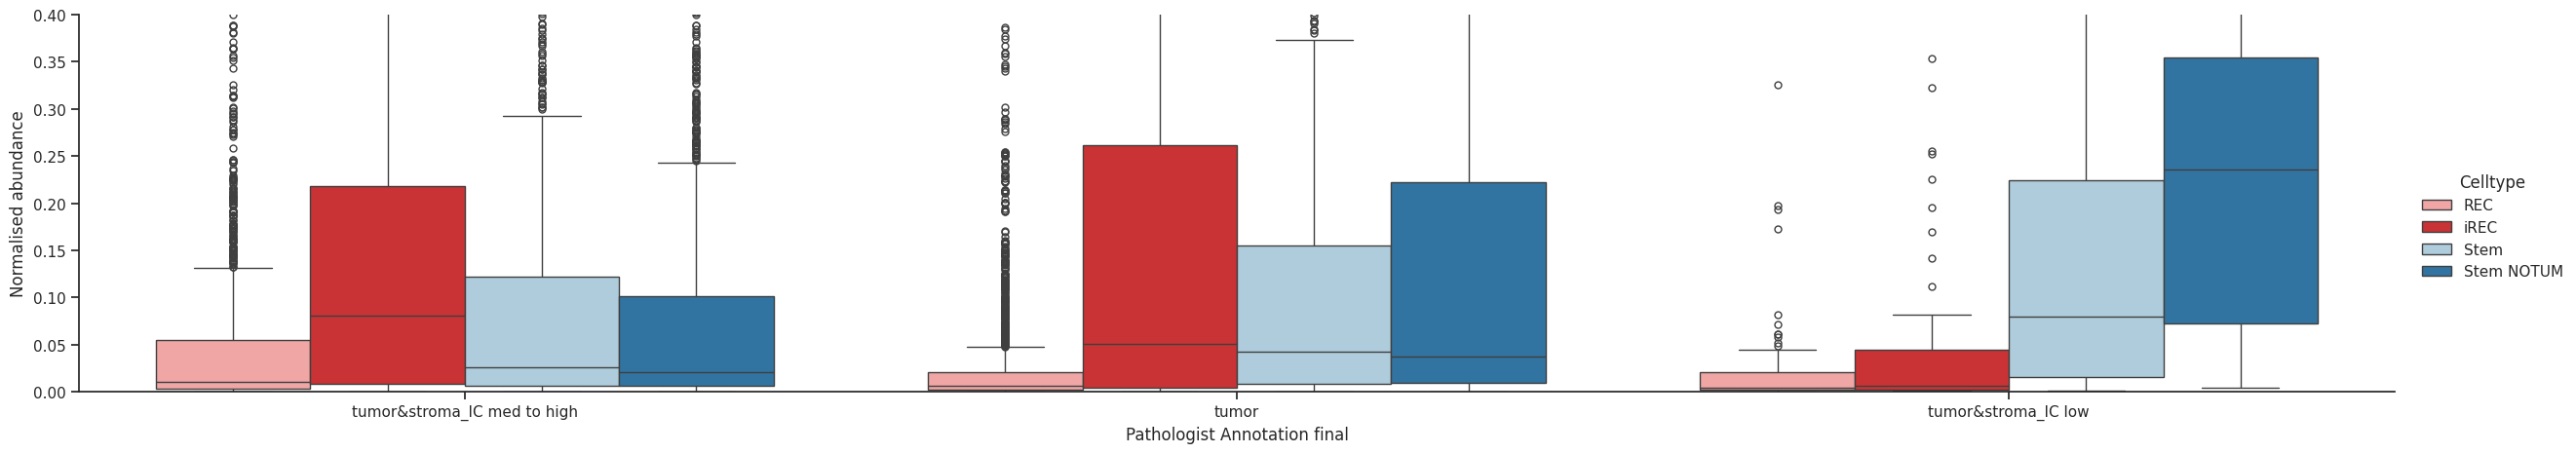

In [51]:
sns.catplot(data=melted_df_tumour, x="Pathologist Annotation final", y="Normalised abundance", hue="Celltype", kind="box",
            height=5, aspect=5,
            palette=palette_cancer_states_dict.values()
           )
plt.ylim((0,0.4))
plt.savefig(
    f"{FIG2SAVE}/iRECs_stem_abundance_pathological_annotations_tumour_regions_only_2.pdf",
    bbox_inches="tight",
    facecolor='white'
)
plt.show()

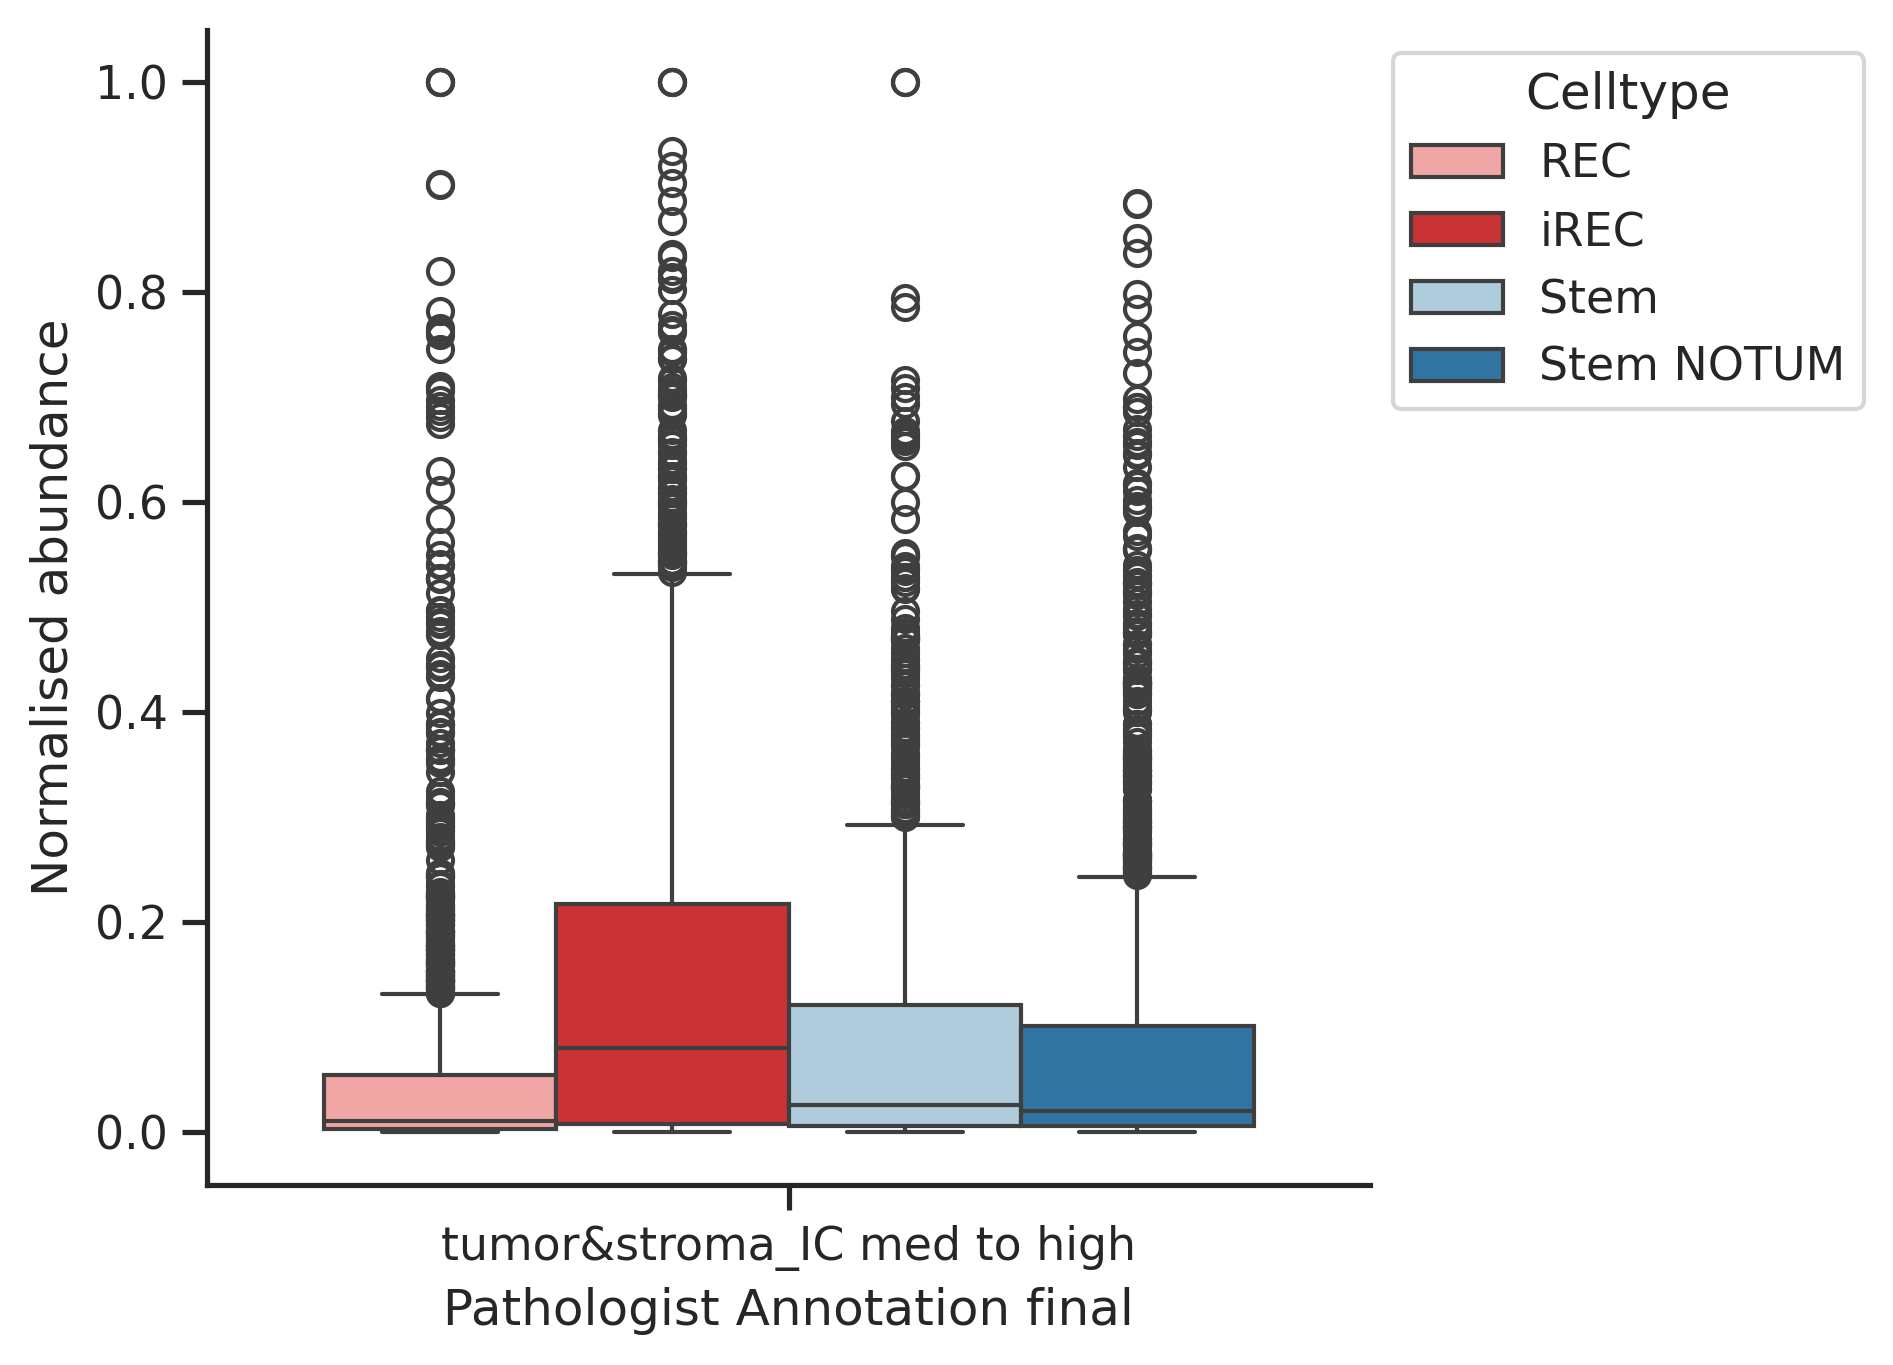

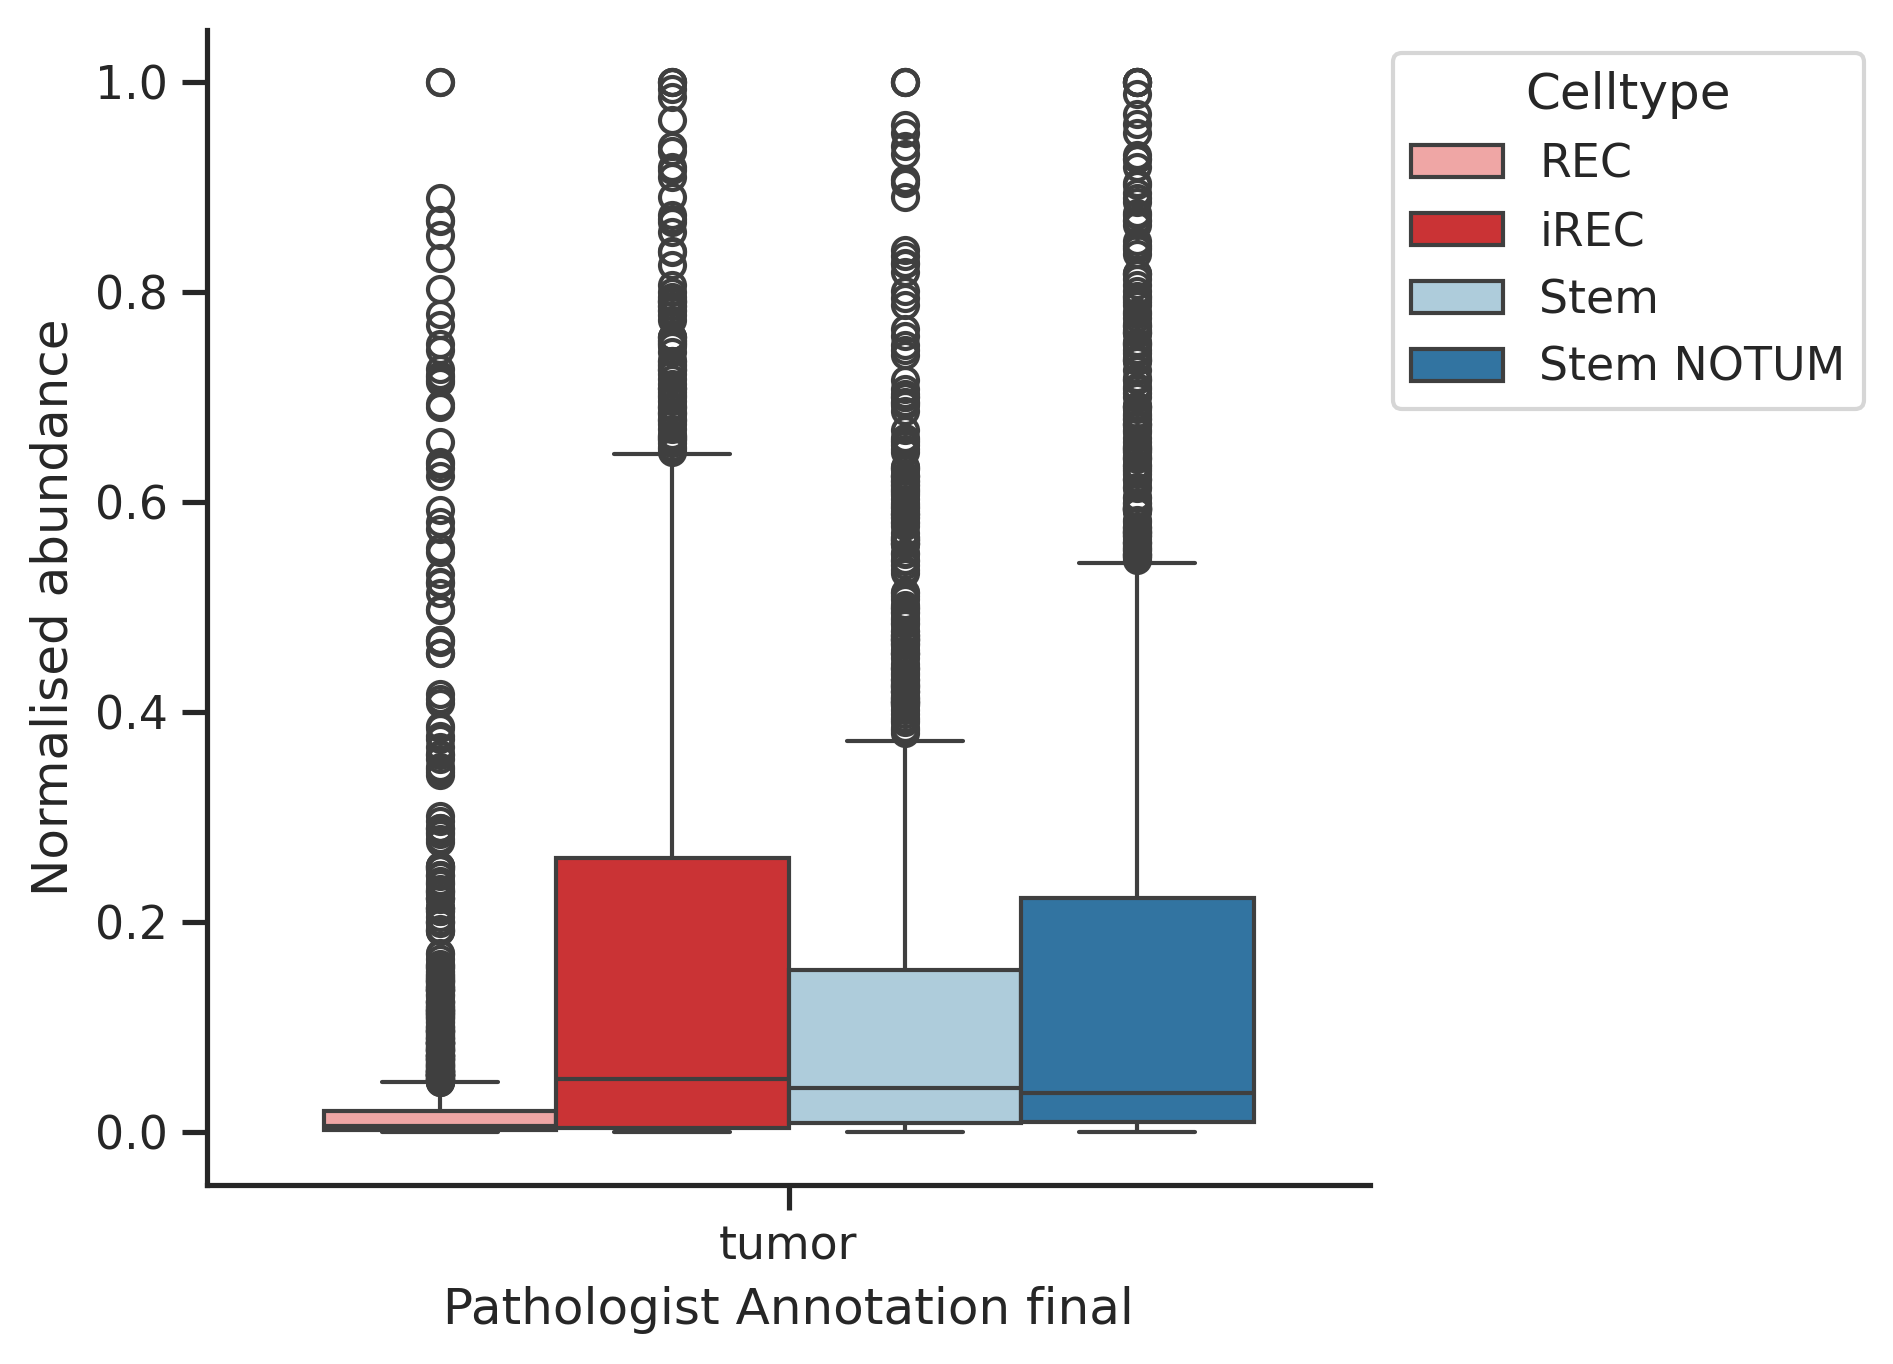

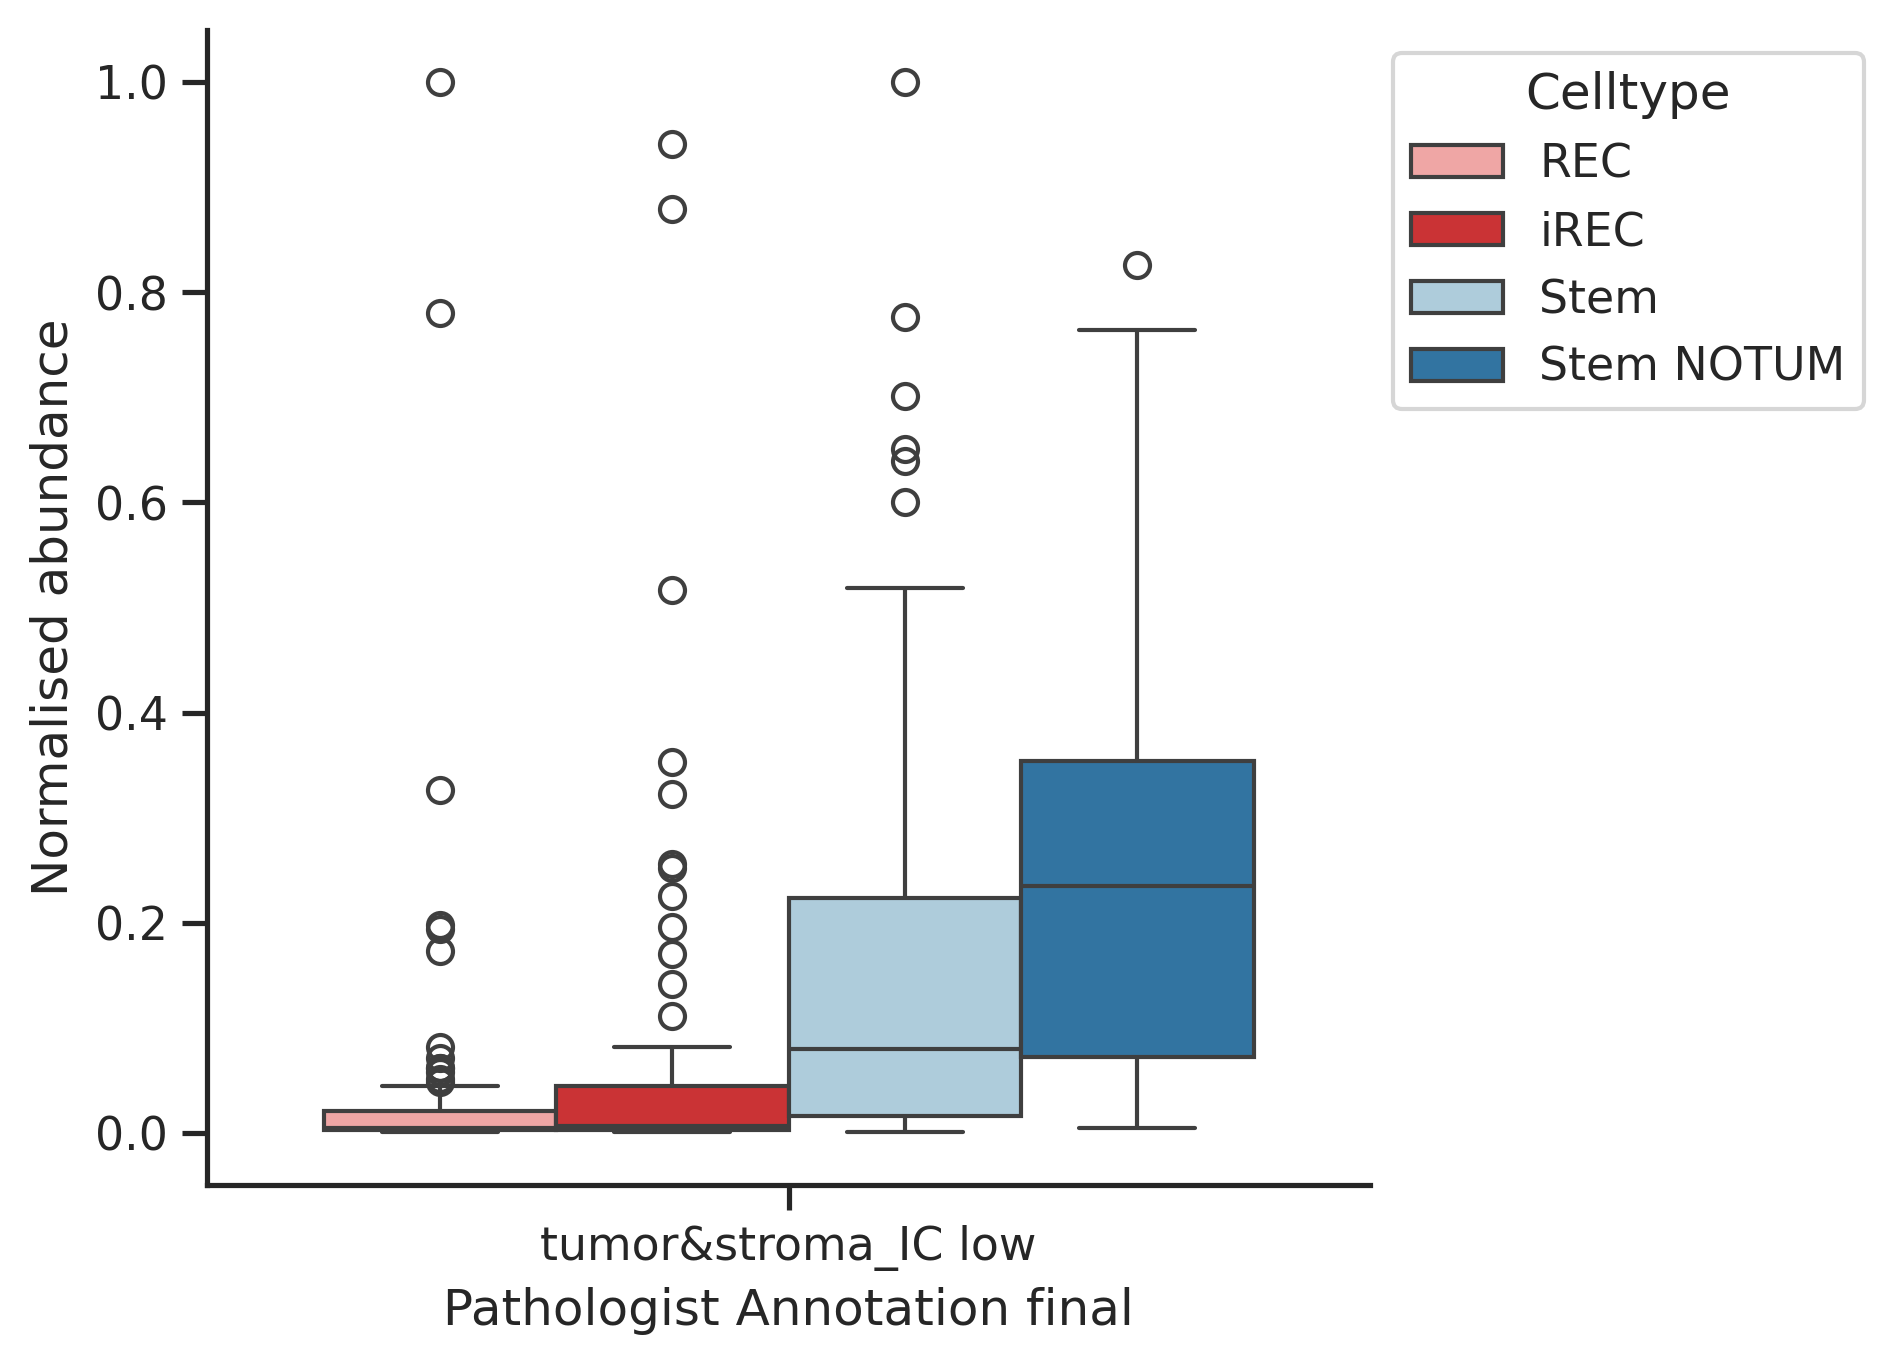

In [52]:
for t in melted_df_tumour['Pathologist Annotation final'].unique():
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(5,5))
    
    sns.boxplot(data=melted_df_tumour[melted_df_tumour['Pathologist Annotation final']==t],
                x="Pathologist Annotation final",
                y="Normalised abundance", 
                hue="Celltype", 
                palette=palette_cancer_states_dict.values(),
                ax=ax
               )
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
    sns.despine()
    
    fig.savefig(FIG2SAVE.joinpath(f"iRECs_stem_abundance_pathological_annotations_tumour_regions_only_2_{t}.pdf"), 
                dpi=DPI, 
                format="pdf",
                bbox_inches="tight")
    plt.show()

Boxenplots (actually called letter-value plots in the original paper and in the lvplot R package) show the distribution differently and are better for bigger datasets. Classic boxplots can have too many outliers and don't show as much information about the distribution. Letter-value plots (boxenplots) start with the median (Q2, 50th percentile) as the centerline. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level. Each level out is shaded lighter. There are 4 methods for calculating outliers (described in the paper and available in seaborn). The default is to end up with around 5-8 outliers in each tail.

## Compute statistical tests : which test to use? two tailed, one sided?

1. we want to look at differrence in prop/mean/median of cell abundancne in a tissue region
2. we want to look at difference in mean/prop/median across tissue region for a cell type

Options
1. mann-whitney test or Wilcoxon rank-sum test: non parametric, do we do two tailed test? or Kruskal-Wallis? --> i think i will use this 

Kruskal-Wallis: is a non-parametric test, meaning that it assumes no particular distribution of your data and is analogous to the one-way analysis of variance (ANOVA). The Kruskal Wallis test is sometimes referred to as the one-way ANOVA on ranks or the Kruskal Wallis one-way ANOVA. 

The hypotheses of the Kruskal–Wallis test are as follows:

    - The null hypothesis (H0) is that the population medians are equal.
    - The alternative hypothesis (H1) is that the population medians are not equal, or that the population median differs from the population median of one of the other groups.
    
    Kruskal–Wallis test assumptions

Assumptions for the Kruskal–Wallis test are detailed below:

   -  Data are assumed to be non-Normal or take a skewed distribution. One-way ANOVA should be used when data follow a Normal distribution.
   - The variable of interest should have two or more independent groups. The test is most commonly used in the analysis of three or more groups – for analyzing two groups the Mann-Whitney U test should be used instead.
   - The data are assumed to take a similar distribution across the groups.
   - The data should be randomly selected independent samples, in that the groups should have no relationship to each other.
   - Each group sample should have at least 5 observations for a sufficient sample size.

These assumptions are similar to the Mann–Whitney U test, as the Kruskal–Wallis test is essentially an extension of that test with more than two independent samples. Similar to the Mann-Whitney U Test, the Kruskal–Wallis test is based on ranking the data and calculating a test statistic.  

2. t test independent
3. fisher's exact test


In [56]:
set(melted_df_tumour['Pathologist Annotation final'])

{'tumor', 'tumor&stroma_IC low', 'tumor&stroma_IC med to high'}

### lets's do Kruskal-Wallis

In [62]:
results_kruskal_test = dict()
for c in melted_df_tumour.Celltype.unique():
    print("--", c)
    tmp_df = melted_df_tumour[melted_df_tumour['Celltype']==c].copy()
    
    statistic, pval = stats.kruskal(tmp_df[tmp_df['Pathologist Annotation final']=='tumor&stroma_IC med to high']['Normalised abundance'],
                                    tmp_df[tmp_df['Pathologist Annotation final']=='tumor']['Normalised abundance'],
                                    tmp_df[tmp_df['Pathologist Annotation final']=='tumor&stroma_IC low']['Normalised abundance'],
                  )
    print(statistic, pval)
    results_kruskal_test[c] = (statistic, pval)

-- REC
76.71475398669634 2.1958508173992032e-17
-- iREC
28.15149814425298 7.708677010109886e-07
-- Stem
30.296427485180867 2.6376329585807e-07
-- Stem NOTUM
112.04296081194354 4.679292479371867e-25


### As follow up- Post-hoc test: Dunn
Multiple hypothesis correction was used in the post-hoc Dunn test


pip install scikit-posthocs

https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html

https://github.com/maximtrp/scikit-posthocs/tree/master

In [63]:
results_dunn_test = dict()
for c in melted_df_tumour.Celltype.unique():
    print("--", c)
    tmp_df = melted_df_tumour[melted_df_tumour['Celltype']==c].copy()
    
    data = [
    tmp_df[tmp_df['Pathologist Annotation final']=='tumor&stroma_IC med to high']['Normalised abundance'].rename('tumor&stroma_IC med to high'),
    tmp_df[tmp_df['Pathologist Annotation final']=='tumor']['Normalised abundance'].rename('tumor'),
    tmp_df[tmp_df['Pathologist Annotation final']=='tumor&stroma_IC low']['Normalised abundance'].rename('tumor&stroma_IC low')
    ]
    
    # Using the posthoc_dunn() function
    p_values = scikit_posthocs.posthoc_dunn(data, p_adjust='fdr_by')
    print(p_values)
    results_dunn_test[c] = p_values

-- REC
              1             2       3
1  1.000000e+00  2.070199e-17  0.0251
2  2.070199e-17  1.000000e+00  1.0000
3  2.510033e-02  1.000000e+00  1.0000
-- iREC
          1         2         3
1  1.000000  0.009165  0.000005
2  0.009165  1.000000  0.000097
3  0.000005  0.000097  1.000000
-- Stem
          1         2         3
1  1.000000  0.000025  0.000422
2  0.000025  1.000000  0.024538
3  0.000422  0.024538  1.000000
-- Stem NOTUM
              1             2             3
1  1.000000e+00  8.036313e-15  5.460140e-16
2  8.036313e-15  1.000000e+00  2.448497e-09
3  5.460140e-16  2.448497e-09  1.000000e+00


In [64]:
results_dunn_test

{'REC':               1             2       3
 1  1.000000e+00  2.070199e-17  0.0251
 2  2.070199e-17  1.000000e+00  1.0000
 3  2.510033e-02  1.000000e+00  1.0000,
 'iREC':           1         2         3
 1  1.000000  0.009165  0.000005
 2  0.009165  1.000000  0.000097
 3  0.000005  0.000097  1.000000,
 'Stem':           1         2         3
 1  1.000000  0.000025  0.000422
 2  0.000025  1.000000  0.024538
 3  0.000422  0.024538  1.000000,
 'Stem NOTUM':               1             2             3
 1  1.000000e+00  8.036313e-15  5.460140e-16
 2  8.036313e-15  1.000000e+00  2.448497e-09
 3  5.460140e-16  2.448497e-09  1.000000e+00}

### 2. for a tissue, different normalised cell abundances 

Kruskal-Wallis
Dunn
fir a given tissue show difference in abundance of cell types

In [66]:
melted_df_tumour.Celltype.unique()

array(['REC', 'iREC', 'Stem', 'Stem NOTUM'], dtype=object)

In [67]:
results_kruskal_region = dict()
for region in melted_df_tumour['Pathologist Annotation final'].unique():
    print("--", region)
    tmp_df = melted_df_tumour[melted_df_tumour['Pathologist Annotation final']==region].copy()
    
    statistic, pval = stats.kruskal(tmp_df[tmp_df['Celltype']=='REC']['Normalised abundance'],
                                    tmp_df[tmp_df['Celltype']=='iREC']['Normalised abundance'],
                                    tmp_df[tmp_df['Celltype']=='Stem']['Normalised abundance'],
                                    tmp_df[tmp_df['Celltype']=='Stem NOTUM']['Normalised abundance']
                  )
    print(statistic, pval)
    results_kruskal_region[region] = (statistic, pval)

-- tumor&stroma_IC med to high
263.2516750246739 8.90002359487705e-57
-- tumor
808.4996244864643 6.206594511842194e-175
-- tumor&stroma_IC low
104.11963501002174 2.020819511121e-22


In [68]:
results_dunn_region = dict()
for region in melted_df_tumour['Pathologist Annotation final'].unique():
    print("--", region)
    tmp_df = melted_df_tumour[melted_df_tumour['Pathologist Annotation final']==region].copy()
    
    data = [
        tmp_df[tmp_df['Celltype']=='REC']['Normalised abundance'].rename('REC'),
        tmp_df[tmp_df['Celltype']=='iREC']['Normalised abundance'].rename('iREC'),
        tmp_df[tmp_df['Celltype']=='Stem']['Normalised abundance'].rename('Stem'),
        tmp_df[tmp_df['Celltype']=='Stem NOTUM']['Normalised abundance'].rename('Stem NOTUM')
    ]
    
    # Using the posthoc_dunn() function
    p_values = scikit_posthocs.posthoc_dunn(data, p_adjust='fdr_by')
    print(p_values)
    results_dunn_region[region] = p_values

-- tumor&stroma_IC med to high
              1             2             3             4
1  1.000000e+00  8.293667e-58  4.458807e-17  1.117247e-13
2  8.293667e-58  1.000000e+00  1.020676e-13  4.458807e-17
3  4.458807e-17  1.020676e-13  1.000000e+00  7.572614e-01
4  1.117247e-13  4.458807e-17  7.572614e-01  1.000000e+00
-- tumor
               1              2              3              4
1   1.000000e+00  2.090566e-105  5.050541e-111  2.747122e-135
2  2.090566e-105   1.000000e+00   1.000000e+00   1.039893e-02
3  5.050541e-111   1.000000e+00   1.000000e+00   5.015570e-02
4  2.747122e-135   1.039893e-02   5.015570e-02   1.000000e+00
-- tumor&stroma_IC low
              1             2             3             4
1  1.000000e+00  1.000000e+00  1.425144e-08  5.728421e-17
2  1.000000e+00  1.000000e+00  8.378951e-07  1.745624e-14
3  1.425144e-08  8.378951e-07  1.000000e+00  1.778601e-02
4  5.728421e-17  1.745624e-14  1.778601e-02  1.000000e+00
